# Installing and importing libraries

In [244]:
!pip install statsbombpy
!pip install nose2
!nose2 -v --pretty-assert
!pip install socceraction
!pip install mplsoccer



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


## All libraries are imported here

In [245]:
import pandas as pd
import numpy as np
from statsbombpy import sb
from sklearn.preprocessing import LabelEncoder
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,  GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingRegressor
from math import atan, degrees, sqrt
import numpy.typing as npt
from typing import Tuple
import matplotlib.patches as mpatches
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from mplsoccer.pitch import Pitch
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

# Data Engineering

## Creating out the data and exploring it

In [246]:
dir(sb)

['DEFAULT_CREDS',
 'MAX_CONCURRENCY',
 'Pool',
 'Union',
 '_360_frames',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'api_client',
 'competition_events',
 'competition_frames',
 'competitions',
 'events',
 'filter_and_group_events',
 'frames',
 'lineups',
 'matches',
 'merge_events_and_frames',
 'partial',
 'pd',
 'player_match_stats',
 'player_season_stats',
 'public',
 'reduce_events',
 'team_season_stats']

## Getting competition that we need

In [247]:
df = sb.competitions() # Show all competitions

FWC = df[df['competition_name'] == 'FIFA World Cup']
FWC # See all the tournaments for the Fifa World Cup, we will be working with the most recent world cup
# FIFA World Cup 2022

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
26,43,106,International,FIFA World Cup,male,False,True,2022,2023-07-25T08:25:10.360401,2023-07-25T09:10:59.976019,2023-07-25T09:10:59.976019,2023-07-25T08:25:10.360401
27,43,3,International,FIFA World Cup,male,False,True,2018,2023-07-24T13:09:34.513519,2021-06-13T16:17:31.694,None,2023-07-24T13:09:34.513519
28,43,55,International,FIFA World Cup,male,False,True,1990,2023-06-28T10:58:20.137929,2021-06-12T16:17:31.694,None,2023-06-28T10:58:20.137929
29,43,54,International,FIFA World Cup,male,False,True,1986,2023-06-28T11:20:34.252935,2021-06-13T16:17:31.694,None,2023-06-28T11:20:34.252935
30,43,51,International,FIFA World Cup,male,False,True,1974,2023-07-17T23:19:58.853207,2021-06-13T16:17:31.694,None,2023-07-17T23:19:58.853207
31,43,272,International,FIFA World Cup,male,False,True,1970,2023-07-17T23:24:45.579886,None,None,2023-07-17T23:24:45.579886
32,43,270,International,FIFA World Cup,male,False,True,1962,2023-06-26T10:38:00.323984,None,None,2023-06-26T10:38:00.323984
33,43,269,International,FIFA World Cup,male,False,True,1958,2023-06-26T10:33:08.214831,None,None,2023-06-26T10:33:08.214831


In [248]:
df.loc[:, "competition_name"] # checking all the names for all competitions

0          1. Bundesliga
1       Champions League
2       Champions League
3       Champions League
4       Champions League
             ...        
60               Serie A
61             UEFA Euro
62    UEFA Europa League
63     UEFA Women's Euro
64     Women's World Cup
Name: competition_name, Length: 65, dtype: object

In [249]:
df.columns # check all the columns that i can use

Index(['competition_id', 'season_id', 'country_name', 'competition_name',
       'competition_gender', 'competition_youth', 'competition_international',
       'season_name', 'match_updated', 'match_updated_360',
       'match_available_360', 'match_available'],
      dtype='object')

## All the matches that happened in the World Cup 2022

In [250]:
WC22 = sb.matches(competition_id= 43, season_id = 106).head(3) # They are 64 rows in total because there were 64 games.
WC22

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-05-14T23:35:15.370647,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2


In [251]:
ARG_AUS_events = sb.events(match_id=3869151) # ARG VS AUS
ARG_AUS_events.head(3)

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",Australia,792,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Australia,792,00:00:00.000,Half Start,NaN


In [252]:
sb.events(match_id=3869151, split=True, flatten_attrs=False)["dribbles"].head(3)

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,position,location,duration,under_pressure,related_events,dribble,match_id,possession_team_id,team_id,player_id
0,99b8ff1b-6a2e-4760-80e0-23ea3faad7b4,542,1,00:10:39.234,10,39,Dribble,19,Argentina,From Throw In,...,Left Wing,"[37.4, 19.6]",0.0,True,"[538e28ba-619c-4dc2-9000-813213a7d2b2, 9002f77...","{'outcome': {'id': 9, 'name': 'Incomplete'}}",3869151,779,779,7006
1,535ff683-fb17-453c-a244-47bb68ed945a,899,1,00:18:00.854,18,0,Dribble,27,Argentina,Regular Play,...,Right Back,"[33.3, 75.3]",0.0,True,[3bbe48cd-14c3-4d28-a52b-70d9a3495e6f],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3869151,779,779,29201
2,abba290b-f012-4617-83a5-629d6884a7bf,1446,1,00:29:08.965,29,8,Dribble,45,Australia,Regular Play,...,Right Back,"[19.4, 72.3]",0.0,True,[a704f209-00a7-42f4-a4c2-ca05c38d5c69],"{'outcome': {'id': 8, 'name': 'Complete'}}",3869151,792,792,15957


In [253]:
sb.lineups(match_id=3869151)["Argentina"].head(3)

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,2995,Ángel Fabián Di María Hernández,Ángel Di María,11,Argentina,[],[]
1,3090,Nicolás Hernán Otamendi,Nicolás Otamendi,19,Argentina,[],"[{'position_id': 5, 'position': 'Left Center B..."
2,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,Argentina,[],"[{'position_id': 23, 'position': 'Center Forwa..."


In [254]:
arg_vs_aus = sb.events(match_id=3869151, split=True, flatten_attrs=False)['passes']
arg_vs_aus.head(3)
arg_vs_aus['location'].max() # Here we can know that they are using the pitch dimensions in yards.

[120.0, 80.0]

In [255]:
arg_vs_aus.keys()

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'pass',
       'match_id', 'possession_team_id', 'team_id', 'player_id',
       'under_pressure', 'off_camera', 'counterpress', 'out'],
      dtype='object')

In [256]:
sb.events(match_id=3857254, split=True, flatten_attrs=False)["dribbles"].head(3) # get all the events dribbles for  Argentia vs Australia

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,position,location,duration,under_pressure,related_events,dribble,match_id,possession_team_id,team_id,player_id
0,4fbb9158-3623-429f-8e9d-8ef3b95921ee,192,1,00:04:15.413,4,15,Dribble,13,Tunisia,Regular Play,...,Right Center Back,"[97.4, 63.1]",0.0,True,[10cb6ed6-e822-46fa-8a14-96d665cf1692],"{'outcome': {'id': 9, 'name': 'Incomplete'}, '...",3857254,777,777,5655
1,0d98a659-01a2-4b7c-9283-2da40e473713,631,1,00:15:24.934,15,24,Dribble,33,Denmark,Regular Play,...,Left Center Midfield,"[74.2, 6.2]",0.0,True,[b06d46af-7af5-4678-8bfb-a061c8a51139],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3857254,776,776,3043
2,77da4c97-2689-4728-8d8e-e76ebce2c0d5,636,1,00:15:28.127,15,28,Dribble,33,Denmark,Regular Play,...,Left Center Midfield,"[81.4, 3.7]",0.0,True,[d7dc79ac-1fe8-4d05-93fd-f082d0e81b79],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3857254,776,776,3043


## Combining all the events that happened in the WC

In [257]:
# Combining all the events of the Fifa World Cup 2022
events = sb.competition_events(
    country="International",
    division= "FIFA World Cup",
    season="2022",
    gender="male"
)

WC_events22 = sb.competition_events(
    country="International",
    division= "FIFA World Cup",
    season="2022",
    split=True
)
# WC_events22['dribbles'] # Get all the dribbles that happened in the world cup

# grouped_events.drop('id', axis=1, inplace=True)

In [258]:
# Get the list of column names or keys
key_names = WC_events22.keys()

# Print the column names
for key in key_names:
    print(key)

starting_xis
half_starts
passes
ball_receipts
carrys
clearances
ball_recoverys
shots
blocks
goal_keepers
miscontrols
pressures
duels
interceptions
foul_committeds
foul_wons
dispossesseds
dribbles
dribbled_pasts
errors
injury_stoppages
half_ends
substitutions
bad_behaviours
referee_ball_drops
tactical_shifts
player_offs
player_ons
shields
own_goal_fors
own_goal_againsts
50/50s
offsides


In [259]:
WC_events22['shots'].columns # all the columns for the shots event

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_statsbomb_xg', 'shot_end_location', 'shot_technique',
       'shot_body_part', 'shot_type', 'shot_outcome', 'shot_first_time',
       'shot_freeze_frame', 'possession_team_id', 'team_id', 'player_id',
       'shot_key_pass_id', 'shot_one_on_one', 'shot_deflected',
       'under_pressure', 'shot_open_goal', 'shot_aerial_won', 'out',
       'shot_follows_dribble', 'shot_saved_to_post', 'shot_saved_off_target',
       'shot_redirect'],
      dtype='object')

In [260]:
type(WC_events22)

collections.defaultdict

## Get all the shot events in the tournament between player to xG

##### check out the statsbomb xG

In [261]:
xg_df = WC_events22['shots']
xG = xg_df.loc[:, 'player':'shot_statsbomb_xg']
xG

,player,position,location,duration,related_events,match_id,shot_statsbomb_xg
0,Granit Xhaka,Left Defensive Midfield,"[96.0, 38.8]",0.380264,"[23ce15e2-05d8-4adf-87de-90b82585c085, b27d5a6...",3857256,0.036566
1,Breel-Donald Embolo,Center Forward,"[113.1, 40.7]",0.175803,[ca8f5082-211d-4c5e-9827-b61cf7fa7ca2],3857256,0.353289
2,Granit Xhaka,Left Defensive Midfield,"[103.8, 41.9]",0.495575,[03e8c43d-a1ee-4477-a6cd-3761b9379837],3857256,0.069527
3,Nikola Milenković,Right Center Back,"[112.2, 36.8]",0.848375,[42dca3d5-9c35-4da4-8d13-0ae643b4d9c7],3857256,0.081609
4,Andrija Živković,Right Wing Back,"[97.8, 51.5]",0.934407,[66f1d9e3-640c-493d-80e6-33a247444389],3857256,0.030002
...,...,...,...,...,...,...,...
1489,Andreas Evald Cornelius,Center Forward,"[118.2, 43.9]",0.058813,[b2cf8522-fd3d-44ae-b3d2-6a2c2d40ce7a],3857254,0.568312
1490,Mathias Jensen,Left Defensive Midfield,"[102.5, 24.2]",0.995427,[100b467e-ced3-4e97-ab89-3656d3ab04c5],3857254,0.028724
1491,Andreas Evald Cornelius,Center Forward,"[114.4, 36.8]",1.239140,"[a4edfab9-529b-4f34-b150-bf665f559ce5, f1dcd43...",3857254,0.145394
1492,Joakim Mæhle,Left Back,"[95.0, 30.2]",0.164703,"[2da1a8a2-7c43-4ffa-91da-a4ed3d276e8c, 8c6aa51...",3857254,0.028684


In [262]:
Final_df = pd.DataFrame()
type(Final_df)

pandas.core.frame.DataFrame

Fill out all the Na values with complete passes

In [263]:
WC_events22['passes']['pass_outcome'].unique()
WC_events22['passes']['pass_outcome'].fillna('Complete', inplace=True)

## Combining the relevent data into one dataframe

#### getting our passes, Carry, and shots to put them into a final_df

In [264]:
WC_events22['player_offs'].columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'duration', 'related_events', 'match_id',
       'possession_team_id', 'team_id', 'player_id', 'off_camera'],
      dtype='object')

In [265]:
# Merge the DataFrames based on 'match_id', 'index', and 'location' columns
# Now, create a new DataFrame by taking the 'column_name' column from df1
WC_events22_passes = WC_events22['passes'][['match_id','index', 'team', 'player' ,'timestamp','minute', 'second', 'duration','period',
                                           'possession' ,'position','play_pattern' ,'location', 'type',
                                            'pass_end_location', 'under_pressure', 'pass_length',  'pass_angle']].copy()

WC_events22_carrys = WC_events22['carrys'][['match_id','index', 'team', 'player' ,'timestamp','minute',
                                            'second', 'period','possession','position' , 'play_pattern', 'duration',
                                            'location', 'type',  'carry_end_location', 'under_pressure'
                                            ]].copy()

# WC_events22_dribbles = WC_events22['player_offs'][['match_id','index', 'team', 'player' ,'timestamp','minute', 'duration',
#                                                 'second', 'period','possession','position' ,
#                                                 'location', 'type', 'under_pressure'  ]].copy()


WC_events22_shot = WC_events22['shots'][['match_id','index', 'team', 'player' ,'timestamp','minute', 'second', 'period','duration',
                                         'possession', 'position' ,'play_pattern' ,'location','shot_outcome', 'shot_end_location' , 'shot_technique',
                                         'shot_statsbomb_xg' , 'type', 'under_pressure', 'shot_type', 'shot_body_part', 'shot_freeze_frame']].copy()



# Combine the DataFrames by stacking them vertically (top on top)
final_df = pd.concat([WC_events22_passes, WC_events22_carrys, WC_events22_shot

                      ], axis=0)
# The most important events that we have is shoot, pass, dribble, carry.

# Sort the final DataFrame by 'index' column
final_df.sort_values(by=['match_id','index'], inplace=True)

# Reset the index of the DataFrame
final_df.reset_index(drop=True, inplace=True)

final_df.head(3)
'''
shot_first_time          1026
shot_one_on_one          1409
shot_deflected           1472
shot_open_goal           1481
shot_aerial_won          1365
shot_follows_dribble     1491
shot_saved_to_post       1491
shot_saved_off_target    1492
shot_redirect            1492

they are missing almost all of them so we have to delete it from our code.
'''


'\nshot_first_time          1026\nshot_one_on_one          1409\nshot_deflected           1472\nshot_open_goal           1481\nshot_aerial_won          1365\nshot_follows_dribble     1491\nshot_saved_to_post       1491\nshot_saved_off_target    1492\nshot_redirect            1492\n\nthey are missing almost all of them so we have to delete it from our code.\n'

### Pre-processing for the final_df

In [266]:
final_df['under_pressure'] = final_df['under_pressure'].fillna(False)
final_df['under_pressure'].unique()



array([False,  True])

Removing the penalties shootout from the equation

In [267]:
final_df = final_df.drop(final_df[final_df['period'] == 5].index)
# final_df

'''
 Goals scored and xG generated from penalties are often removed
 from player and team totals when analysing performance.

 https://statsbomb.com/soccer-metrics/expected-goals-xg-explained/.
'''

'\n Goals scored and xG generated from penalties are often removed\n from player and team totals when analysing performance.\n\n https://statsbomb.com/soccer-metrics/expected-goals-xg-explained/.\n'

#### Combining the end locations together to make end_location

combine all end locations together

In [268]:
final_df['end_location'] = final_df['pass_end_location']
final_df['end_location'] = final_df['end_location'].combine_first(final_df['carry_end_location'])
final_df['end_location'] = final_df['end_location'].combine_first(final_df['shot_end_location'])
final_df.columns

Index(['match_id', 'index', 'team', 'player', 'timestamp', 'minute', 'second',
       'duration', 'period', 'possession', 'position', 'play_pattern',
       'location', 'type', 'pass_end_location', 'under_pressure',
       'pass_length', 'pass_angle', 'carry_end_location', 'shot_outcome',
       'shot_end_location', 'shot_technique', 'shot_statsbomb_xg', 'shot_type',
       'shot_body_part', 'shot_freeze_frame', 'end_location'],
      dtype='object')

Drop all the excess columns after joining them

In [269]:
final_df = final_df.drop(columns=['pass_end_location', 'carry_end_location'

                                  ])


## Apply the formula to find xT

### We need to do binning first to make the grid into equal dimensions

In [270]:
def _safe_divide(a: npt.ArrayLike, b: npt.ArrayLike) -> npt.NDArray[np.float64]:
    return np.divide(a, b, out=np.zeros_like(a, dtype="float64"), where=b != 0, casting="unsafe")

The formula is: xTxy = (Sxy * Gxy) + (Mxy 16∑ 12∑T(x,y)→(z,w)xTz,w )


#### great row and column as the new 12x16 grid

In [271]:

def create_grid_cells(location, num_rows, num_columns, x_max, y_max):
    """
    Assign a grid cell to each location based on its (x, y) coordinates.

    Parameters:
        location (tuple): (x, y) coordinates of the location.
        num_rows (int): Number of rows in the grid.
        num_columns (int): Number of columns in the grid.
        x_max (float): Maximum x-coordinate value on the field.
        y_max (float): Maximum y-coordinate value on the field.

    Returns:
        tuple: (row, column) indices of the grid cell for the given location.
    """
    x, y = location
    row = int(num_rows * y / y_max)
    column = int(num_columns * x / x_max)
    return row, column

# Define the dimensions of the grid (12x16)
num_rows, num_columns = 11, 15

# Determine the maximum x and y coordinates from the 'location' column
x_max = final_df['location'].apply(lambda loc: loc[0]).max()
y_max = final_df['location'].apply(lambda loc: loc[1]).max()

# Create new columns 'row' and 'column' to store the grid cell indices
final_df[['row', 'column']] = final_df['location'].apply(lambda loc: create_grid_cells(loc, num_rows, num_columns, x_max, y_max)).tolist()

# Now the 'final_df' DataFrame contains the 'row' and 'column' columns with the grid cell indices for each location.
print("There is {} rows and {} columns ".format(final_df['row'].max(), final_df['column'].max()))

There is 11 rows and 15 columns 


##### also make it into a list

In [272]:
final_df['start_cell'] = final_df[['row', 'column']].apply(np.array, axis=1)

#### Now we need to create the same thing but the end location for the event

some events that are shots have the end location and also the height of the shot when it ends up in goal

In [273]:
final_df['end_location'] = final_df['end_location'].apply(lambda x:
                                    x[:-1] if isinstance(x, list) and len(x) == 3 else x)

In [274]:
def create_end_grid_cells(location, num_rows, num_columns, x_max, y_max):
    """
    Assign a grid cell to each location based on its (x, y) coordinates.

    Parameters:
        location (tuple): (x, y) coordinates of the location.
        num_rows (int): Number of rows in the grid.
        num_columns (int): Number of columns in the grid.
        x_max (float): Maximum x-coordinate value on the field.
        y_max (float): Maximum y-coordinate value on the field.

    Returns:
        tuple: (row, column) indices of the grid cell for the given location.
    """
    x, y = location
    row = int(num_rows * y / y_max)
    column = int(num_columns * x / x_max)
    return row, column

# Define the dimensions of the grid (12x16)
num_rows, num_columns = 11, 15

x_max = final_df['end_location'].apply(lambda loc: loc[0]).max()
y_max = final_df['end_location'].apply(lambda loc: loc[1]).max()

# Create new columns 'row' and 'column' to store the grid cell indices
final_df[['end_row', 'end_column']] = final_df['end_location'].apply(lambda loc: create_end_grid_cells(loc, num_rows, num_columns, x_max, y_max)).tolist()

# Now the 'final_df' DataFrame contains the 'row' and 'column' columns with the grid cell indices for each location.
print("There is {} end rows and {} end columns ".format(final_df['end_row'].max(), final_df['end_column'].max()))


There is 11 end rows and 15 end columns 


In [275]:
final_df['end_cell'] = final_df[['end_row', 'end_column']].apply(np.array, axis=1)

In [276]:
# final_df.isnull().sum()
# final_df

### We calculate the expected shot, move, transition from x,y to z,w , and xTzw

### Expected Goals (xG)

In [277]:
final_df.loc[final_df['shot_outcome'] == 'Goal', 'goal_scored'] = 1
final_df.loc[final_df['shot_outcome'] != 'Goal', 'goal_scored'] = 0
final_df['goal_scored'].astype(int)
# change the shot outcome to if its a goal or not

0         0
1         0
2         0
3         0
4         0
         ..
123759    0
123760    0
123761    0
123762    0
123763    0
Name: goal_scored, Length: 123731, dtype: int64

In [278]:
#team,minute,second,duration,period,pass_goal_assist, possession, position, play_pattern, location, type, under_pressure, pass_length,
# pass_angle, end_location, technique, event_type, outcome, goal_scored

In [279]:
'''
Create team rankings instead of team names to apply it to our regression model
as the higher the ranking the better the xG for the team
'''

team_rankings = {
    "Brazil": 1,
    "Belgium": 2,
    "Argentina": 3,
    "France": 4,
    "England": 5,
    "Spain": 7,
    "Netherlands": 8,
    "Portugal": 9,
    "Denmark": 10,
    "Germany": 11,
    "Croatia": 12,
    "Mexico": 13,
    "Uruguay": 14,
    "Switzerland": 15,
    "United States": 16,
    "Senegal": 18,
    "Wales": 19,
    "Iran": 20,
    "Serbia": 21,
    "Morocco": 22,
    "Japan": 24,
    "Poland": 25,
    "South Korea": 28,
    "Tunisia": 30,
    "Costa Rica": 31,
    "Australia": 38,
    "Ecuador": 44,
    "Cameroon": 43,
    "Qatar": 50,
    "Saudi Arabia": 51,
    "Ghana": 61,
    "Canada": 41
}

final_df['team_ranking'] = final_df['team'].map(team_rankings)
# Got their rankings from FIFA.COM

#### To make a regression analysis on xG you need to convert the categorical data into numerical data

In [280]:
xg_df = final_df.copy()

In [281]:
'''
We created a copy of final_df and only checked out the shots dataframe and dropped the indexes
that will be give us any meaning into our analysis
'''
xg_df = xg_df[xg_df['type'] == 'Shot']
xg_df = xg_df.drop(columns=['match_id', 'index', 'player', 'team',
                            'second', 'position',  'type',
                            'pass_length', 'pass_angle', 'end_location',
                            'timestamp',
                                  ])

# xg_df['type'].unique()

In [282]:
xg_df['under_pressure'] = xg_df['under_pressure'].astype(int) # converting under_pressure to numeric
xg_df['foot_shoot'] = xg_df['shot_body_part'].apply(lambda x: 1 if x in ['Right Foot', 'Left Foot'] else 0)
# change the shot_body part if they hit it with their feet or not

categorical_columns = ['shot_type', 'shot_technique', 'play_pattern',
                       'shot_outcome'
                       ]  # Replace with the actual column names

#Perform one-hot encoding using pd.get_dummies()
xg_df = pd.get_dummies(xg_df, columns=categorical_columns)

# print(xg_df_encoded)


In [283]:
xg_df.columns
'''
'team_ranking', 'minute', 'duration', 'period', 'pass_goal_assist', 'play_pattern_encoded',
              'positions_encoded','under_pressure', 'pass_length','pass_angle', 'row', 'column' ,'technique_encoded',
              'event_type_encoded', 'possession', 'type_encoded', 'outcome_encoded'
'''

# xg_df['technique_encoded'].unique()

# Check for missing values in the DataFrame
print(xg_df.isnull().sum())
# xg_df['possession'].unique()

minute                            0
duration                          0
period                            0
possession                        0
location                          0
under_pressure                    0
shot_end_location                 0
shot_statsbomb_xg                 0
shot_body_part                    0
shot_freeze_frame                22
row                               0
column                            0
start_cell                        0
end_row                           0
end_column                        0
end_cell                          0
goal_scored                       0
team_ranking                      0
foot_shoot                        0
shot_type_Corner                  0
shot_type_Free Kick               0
shot_type_Open Play               0
shot_type_Penalty                 0
shot_technique_Backheel           0
shot_technique_Diving Header      0
shot_technique_Half Volley        0
shot_technique_Lob                0
shot_technique_Normal       

#### Find the angle of the shot

In [284]:

post_coord_up = [120, 36]
post_coord_down = [120, 44]

k = 8

def calculate_final_theta(row):
  '''
  Calculating the angle of the shot: The variables that we already know is the two posts locations and the
  distances between the two posts which is k as its constant. Finally, we know the location of the shot where
  its happening.

  if the shot is not between 36 and 44 yards in width then we do theta_big which is tan^-1(k+x)/ A)
  and theta_extra is tan^-1(x/A). then we subtract theta_big with theta_extra to get the angle.

  If shot is between 36 and 44 yards, then it would be a bit different as we need to find theta but subtracting
  180- (theta_up + theta_down). theta_up is tan^-1(opp/adj) where opp is 120 - the row of the shot taken
  and adj is the column of the shot taken minus 36.
  theta_down is the same as its tan^-1(opp/adj) and the same in finding the opp. but to find adj its 44- the col location
  of the shot taken

  This function takes only one attribute which is the dataframe.
  and then it checks for the location for every entry and applies the formula based on its location

  '''
  player_loc = row['location']
  if player_loc[1] <= 36:
      x = abs(player_loc[1] - post_coord_up[1])  # vertical distance between the player and nearest post
      A = abs(player_loc[0] - post_coord_up[0])  # horizontal distance between the player and nearest post
  elif player_loc[1] >= 44:
      x = abs(player_loc[1] - post_coord_down[1])  # vertical distance between the player and nearest post
      A = abs(player_loc[0] - post_coord_down[0])  # horizontal distance between the player and nearest post
  else:  # All other cases where player_loc[1] is between 36 and 44 (exclusive)
      opposite_up = 120 - player_loc[0]
      adjacent_up = player_loc[1] - 36

      theta_up = degrees(atan(opposite_up / adjacent_up))

      opposite_down = 120 - player_loc[0]
      adjacent_down = 44 - player_loc[1]

      theta_down = degrees(atan(opposite_down / adjacent_down))

      final_theta = 180 - (theta_up + theta_down)
      return final_theta

  # Check if A is zero to avoid division by zero
  if A != 0:
      theta_extra = degrees(atan(x / A))
      theta_big = degrees(atan((k + x) / A))

      final_theta = theta_big - theta_extra
  else:
      final_theta = 0  # Set to a default value if A is zero

  return final_theta

# Apply the function to calculate the 'final_theta' for each row
xg_df['shot_angle'] = xg_df.apply(calculate_final_theta, axis=1)
# print(xg_df['final_theta'].max())


In [285]:
min_angle_index = xg_df['shot_angle'].idxmin()
min_angle_location = xg_df.loc[min_angle_index, 'location']

print("Location of the minimum angle:", min_angle_location)


Location of the minimum angle: [120.0, 54.6]


#### Distance shot from goal

In [286]:
# Center_of_goal = [120, 40]

# Assuming 'xg_df' is your DataFrame and 'location' column contains player locations
xg_df['x_distance_from_goal'] = xg_df['location'].apply(lambda loc: 120 - loc[0])
xg_df['y_distance_from_goal'] = xg_df['location'].apply(lambda loc: abs(40 - loc[1]))

def calculate_hyp(row):
  '''
  This function takes only the dataframe and its simple it sees the distance from the shot to the center
  of the goal and gives the distance
  '''
  x = row['x_distance_from_goal']
  y = row['y_distance_from_goal']
  return sqrt(x**2 + y**2) # the hypotonis

xg_df['Distance_shot'] = xg_df.apply(calculate_hyp, axis=1)



In [287]:
# WC_events22['shots']['shot_freeze_frame'][0]

#### Defenders in my shot area

In [288]:
# Convert NaN values to empty lists in the 'shot_freeze_frame' column
xg_df['shot_freeze_frame'] = xg_df['shot_freeze_frame'].fillna(pd.Series([[]] * len(xg_df)))



In [289]:
# Function to filter out the lists with 'teammate' set to True in the shot freeze frame
def filter_freeze_frame(frame):
  '''
  Here i want to create a function for my column to remove all the data
  that has teammates equal to true.

  I need to only see the opposition of the players that are infront of me taking the shot
  '''
  if isinstance(frame, list):
      return [item for item in frame if not item.get('teammate', False)]
  else:
      return []

# Remove lists with 'teammate' set to True in the shot freeze frame
xg_df['shot_freeze_frame'] = xg_df['shot_freeze_frame'].apply(filter_freeze_frame)


In [290]:
left_post = [120, 36]
right_post = [120, 44]

# Function to check if a location is within the triangle formed by the shot and the goal posts
def is_location_within_triangle(location, shot_location):

  '''
  This function checks if a given location is within the triangle formed by the shot_location and the goal posts.
  It does this by first calculating a bounding rectangle that includes the shot_location and the two goal posts.
  Then, it computes the vectors between the shot_location and each of the goal posts, as well as between the location
  and the shot_location. Finally, it calculates the cross products of these vectors and checks if they have the same sign.
  If both conditions (same sign of cross products and location within the bounding rectangle) are satisfied, the
  function returns True, indicating that the location is within the triangle. Otherwise, it returns False.

  '''
  x_min = min(shot_location[0], left_post[0], right_post[0])
  x_max = max(shot_location[0], left_post[0], right_post[0])
  y_min = min(shot_location[1], left_post[1], right_post[1])
  y_max = max(shot_location[1], left_post[1], right_post[1])

  # Calculate the vectors representing the goal posts from the shot location
  vector_left = [left_post[0] - shot_location[0], left_post[1] - shot_location[1]]
  vector_right = [right_post[0] - shot_location[0], right_post[1] - shot_location[1]]
  vector_location = [location[0] - shot_location[0], location[1] - shot_location[1]]

  # Calculate the cross products of the vectors
  cross_left = vector_location[0] * vector_left[1] - vector_location[1] * vector_left[0]
  cross_right = vector_location[0] * vector_right[1] - vector_location[1] * vector_right[0]

  # If the cross products have the same sign and the location is within the bounding rectangle, the location is within the triangle
  return (cross_left >= 0 and cross_right >= 0) and (x_min <= location[0] <= x_max) and (y_min <= location[1] <= y_max)

# Function to count the number of locations within the triangle for each shot
def count_locations_within_triangle(locations_list, shot_location):
  '''
  This function takes a list of dictionaries locations_list and a shot_location. Each dictionary in the
  list represents a location with its corresponding data. The function iterates through the list of
  locations and counts how many of them are within the triangle formed by the shot_location and the goal posts.
  It uses the is_location_within_triangle function to determine if each location is within the triangle or not. The
  function returns the total count of locations within the triangle.

  '''
  count = 0
  for location_dict in locations_list:
      location = location_dict.get('location')
      if location and is_location_within_triangle(location, shot_location):
          count += 1
  return count

# Apply the function to 'shot_freeze_frame' and create a new column 'count_within_triangle'
xg_df['count_within_triangle'] = xg_df.apply(lambda row: count_locations_within_triangle(row['shot_freeze_frame'], row['location']), axis=1)

# Now you have a new column 'count_within_triangle' in the DataFrame, which represents the count of locations in each shot_freeze_frame that are within the triangle formed by the shot location and the goal posts.
xg_df['count_within_triangle'].max()

7

#### Model Implementation for xG

Using SMOTE

In [291]:
X = xg_df[['minute', 'duration', 'period', 'possession', 'team_ranking',
       'under_pressure','row','column',  'shot_angle',
        'Distance_shot', 'foot_shoot', 'count_within_triangle',
        'shot_technique_Backheel', 'shot_technique_Diving Header',
        'shot_technique_Half Volley', 'shot_technique_Lob',
        'shot_technique_Normal','shot_technique_Overhead Kick',
        'shot_technique_Volley']]



y = xg_df['goal_scored']

# Step 3: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Use SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

# Step 6: Make predictions for expected goals (xG) on the test set
xG_predictions = logreg.predict_proba(X_test)[:, 1]

# test_set_with_xG = X_test.copy()
# test_set_with_xG['xG'] = xG_predictions
# print(test_set_with_xG)


##### hyper parameters for xG

In [292]:


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

logreg = LogisticRegression()

# \ of hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300],  # Maximum number of iterations
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

best_logreg_model = grid_search.best_estimator_
xG_logistic_predictions = best_logreg_model.predict_proba(X_test)[:, 1]

test_set_with_xG = X_test.copy()
test_set_with_xG['xG'] = xG_logistic_predictions
# print(test_set_with_xG)


Best Hyperparameters: {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
Best Accuracy Score: 0.8446810278321761


After hyper paramaters apply it for the whole data frame of xg_df

In [293]:
X = xg_df[['minute', 'duration', 'period', 'possession', 'team_ranking',
       'under_pressure','row','column',  'shot_angle',
        'Distance_shot', 'foot_shoot', 'count_within_triangle',
        'shot_technique_Backheel', 'shot_technique_Diving Header',
        'shot_technique_Half Volley', 'shot_technique_Lob',
        'shot_technique_Normal','shot_technique_Overhead Kick',
        'shot_technique_Volley']]

y = xg_df['goal_scored']

logreg = LogisticRegression(C=1, max_iter=100, solver='liblinear')
logreg.fit(X, y)

xG_logistic_predictions = logreg.predict_proba(X)[:, 1]

In [294]:
xg_df['xG'] = xG_logistic_predictions

In [295]:
print(xG_logistic_predictions.shape)
print(type(xG_logistic_predictions))  # Check the type of xG_predictions
print(isinstance(xG_logistic_predictions, np.ndarray))  # Check if xG_predictions is an instance of NumPy ndarray


(1453,)
<class 'numpy.ndarray'>
True


##### visuals for logistic

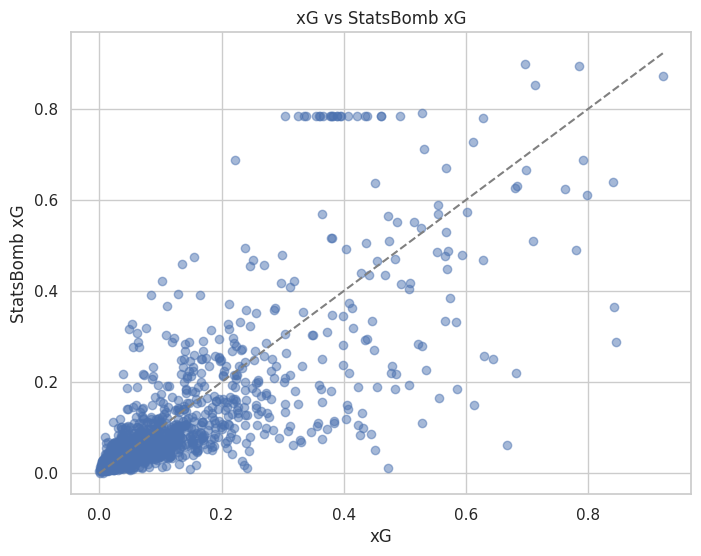

In [296]:


# # Extract the 'xG' and 'statsbombxG' columns
xG_values = xg_df['xG']
statsbombxG_values = xg_df['shot_statsbomb_xg']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(xG_values, statsbombxG_values, alpha=0.5)

# Add labels and title
plt.xlabel('xG')
plt.ylabel('StatsBomb xG')
plt.title('xG vs StatsBomb xG')

# Add a diagonal reference line
max_value = max(xG_values.max(), statsbombxG_values.max())
plt.plot([0, max_value], [0, max_value], linestyle='dashed', color='gray')

# Show the plot
plt.show()

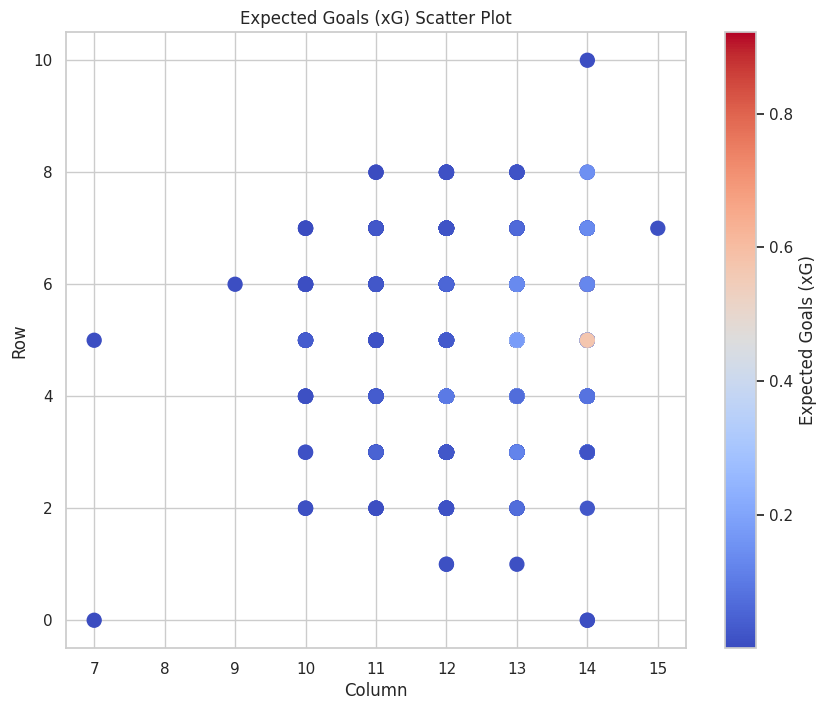

In [297]:

# Extract the 'row', 'column', and 'xG' columns
rows = xg_df['row']
columns = xg_df['column']
xG_values = xg_df['xG']

plt.figure(figsize=(10, 8))
plt.scatter(columns, rows, c=xG_values, cmap='coolwarm', s=100)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Expected Goals (xG)')

plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Expected Goals (xG) Scatter Plot')

plt.show()


In [298]:
average_xG_per_grid = xg_df.groupby(['row', 'column'])['xG'].mean().reset_index()

# average_xG_per_grid

In [299]:


# Create a 2D grid with dimensions 12x16 (replace with your actual grid dimensions)
num_rows, num_columns = 12, 16
grid_xG = np.zeros((num_rows, num_columns))

# Fill the grid with average xG values
for _, row_data in average_xG_per_grid.iterrows():
    row_idx, col_idx, xG_value = int(row_data['row']), int(row_data['column']), row_data['xG']
    grid_xG[row_idx, col_idx] = xG_value

# For future usage, you can directly use the grid_xG NumPy array in your calculations and plots.
print(grid_xG.shape)
print(type(grid_xG))

(12, 16)
<class 'numpy.ndarray'>


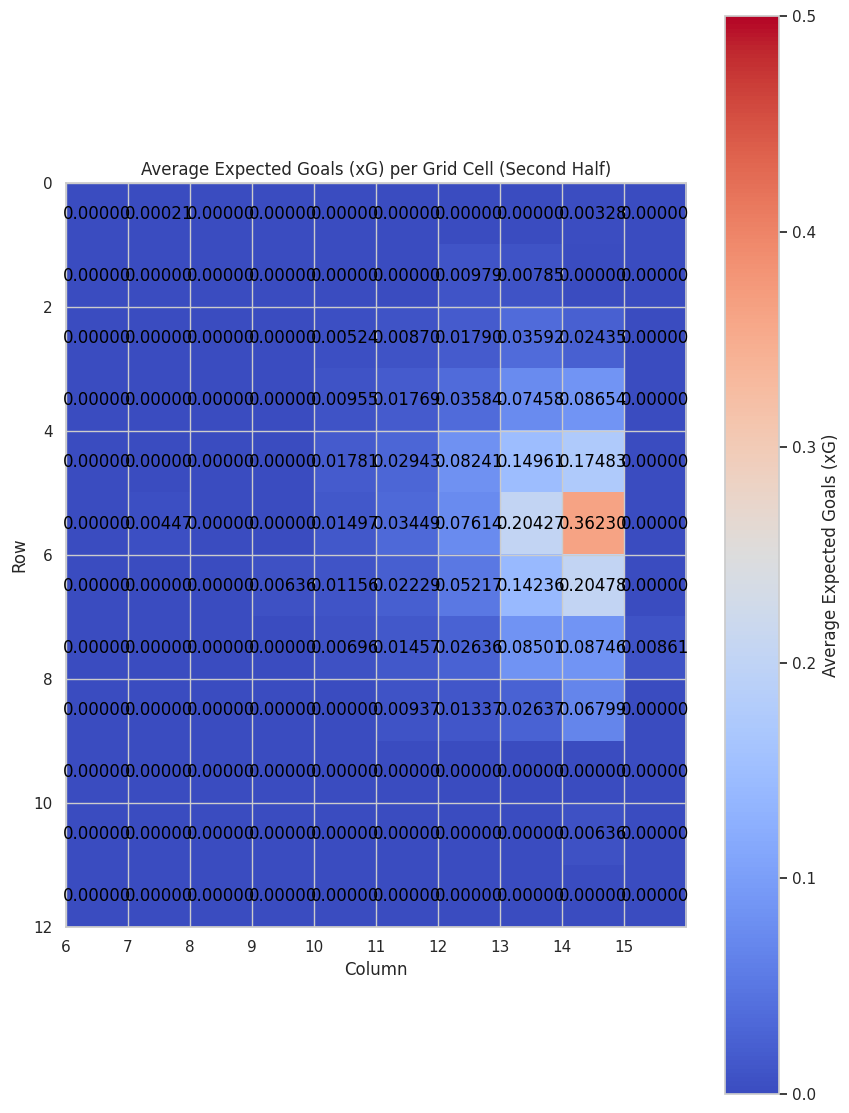

In [300]:

# Create a 2D grid with dimensions 12x16 (replace with your actual grid dimensions)
num_rows, num_columns = 12, 16
grid_xG = np.zeros((num_rows, num_columns))

# Calculate the average xG for each grid cell
average_xG_per_grid = xg_df.groupby(['row', 'column'])['xG'].mean().reset_index()

# Fill the grid with average xG values
for row, column, xG in zip(average_xG_per_grid['row'], average_xG_per_grid['column'], average_xG_per_grid['xG']):
    grid_xG[row, column] = xG

# Create the grid graph
plt.figure(figsize=(10, 14))
plt.imshow(grid_xG[:, 6:], cmap='coolwarm', vmin=0, vmax=0.5, origin='upper', extent=[6, num_columns, num_rows, 0])

# Add value annotations for each cell
for row in range(num_rows):
    for col in range(6, num_columns):
        plt.text(col + 0.5, row + 0.5, f'{grid_xG[row, col]:.5f}', ha='center', va='center', color='black')

# Set labels and title
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Average Expected Goals (xG) per Grid Cell (Second Half)')

# Customize the colorbar
cbar = plt.colorbar()
cbar.set_label('Average Expected Goals (xG)')

# Set the x-axis ticks to show only from 6 to 16 (excluding 0 to 5) and remove the tick labels before position 6
plt.xticks(range(6, num_columns), [f'{col}' if col >= 6 else '' for col in range(6, num_columns)])

# Show the plot
plt.show()


In [301]:

correlation = xg_df['xG'].corr(xg_df['shot_statsbomb_xg'])

print("Correlation between xG and shot_statsbomb_xg:", correlation)


Correlation between xG and shot_statsbomb_xg: 0.7738219307675088


In [302]:
final_df['xG'] = xg_df['xG']

final_df['xG'] = final_df['xG'].fillna(0)

#### Gradient Boosting

In [303]:
X = xg_df[['minute', 'duration', 'period', 'possession', 'team_ranking',
       'under_pressure','row','column',  'shot_angle',
        'Distance_shot', 'foot_shoot', 'count_within_triangle',
        'shot_technique_Backheel', 'shot_technique_Diving Header',
        'shot_technique_Half Volley', 'shot_technique_Lob',
        'shot_technique_Normal','shot_technique_Overhead Kick',
        'shot_technique_Volley']]

y = xg_df['goal_scored']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on the balanced training data
gb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the testing set
y_pred = gb_model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 0.09247875833692214


###### Hyper parameters for gradient boosting

In [304]:
X = xg_df[['minute', 'duration', 'period', 'possession', 'team_ranking',
       'under_pressure','row','column',  'shot_angle',
        'Distance_shot', 'foot_shoot', 'count_within_triangle',
        'shot_technique_Backheel', 'shot_technique_Diving Header',
        'shot_technique_Half Volley', 'shot_technique_Lob',
        'shot_technique_Normal','shot_technique_Overhead Kick',
        'shot_technique_Volley']]

y = xg_df['goal_scored']


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],

}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_gb_model = grid_search.best_estimator_

y_pred = best_gb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Mean Squared Error: 0.06546514945491488


In [305]:
X = xg_df[['minute', 'duration', 'period', 'possession', 'team_ranking',
       'under_pressure','row','column',  'shot_angle',
        'Distance_shot', 'foot_shoot', 'count_within_triangle']]

y = xg_df['goal_scored']

# Apply the hyperparamters
best_gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)

best_gb_model.fit(X, y)

xg_df['xG'] = best_gb_model.predict(X)

# Now the 'xG' column in the DataFrame contains the predicted expected goals for each row
# xg_df

In [306]:
average_xG_per_grid = xg_df.groupby(['row', 'column'])['xG'].mean().reset_index()

###### visuals for gradient boosting

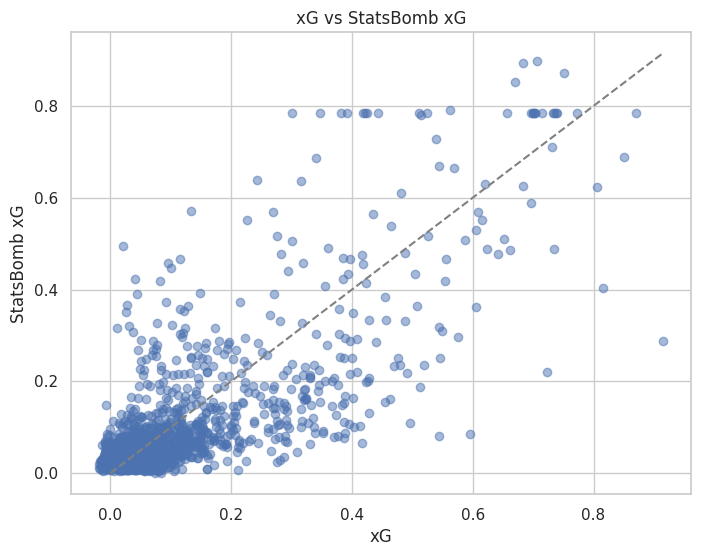

In [307]:

# # Extract the 'xG' and 'statsbombxG' columns
xG_values = xg_df['xG']
statsbombxG_values = xg_df['shot_statsbomb_xg']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(xG_values, statsbombxG_values, alpha=0.5)

plt.xlabel('xG')
plt.ylabel('StatsBomb xG')
plt.title('xG vs StatsBomb xG')

max_value = max(xG_values.max(), statsbombxG_values.max())
plt.plot([0, max_value], [0, max_value], linestyle='dashed', color='gray')
plt.show()

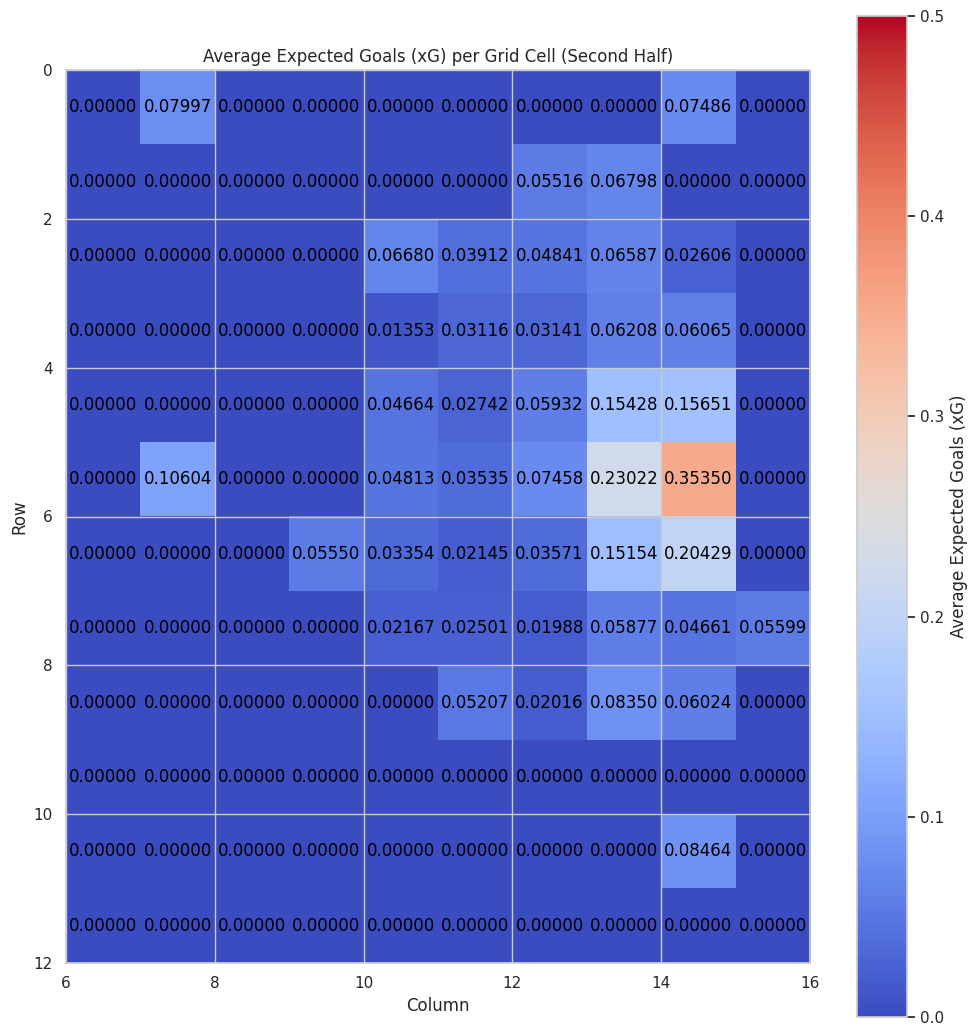

In [308]:
num_rows, num_columns = 12, 16
grid_xG = np.zeros((num_rows, num_columns))

average_xG_per_grid = xg_df.groupby(['row', 'column'])['xG'].mean().reset_index()

# Fill the grid with average xG values
for row, column, xG in zip(average_xG_per_grid['row'], average_xG_per_grid['column'], average_xG_per_grid['xG']):
    grid_xG[row, column] = xG

# Create the grid graph
plt.figure(figsize=(12, 13))
plt.imshow(grid_xG[:, 6:], cmap='coolwarm', vmin=0, vmax=0.5, origin='upper', extent=[6, num_columns, num_rows, 0])

# Add value annotations for each cell
for row in range(num_rows):
    for col in range(6, num_columns):
        plt.text(col + 0.5, row + 0.5, f'{grid_xG[row, col]:.5f}', ha='center', va='center', color='black')

plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Average Expected Goals (xG) per Grid Cell (Second Half)')
cbar = plt.colorbar()
cbar.set_label('Average Expected Goals (xG)')
plt.show()


In [309]:
correlation = xg_df['xG'].corr(xg_df['shot_statsbomb_xg'])

print("Correlation between xG and shot_statsbomb_xg:", correlation)
# 0.7727601691392486

Correlation between xG and shot_statsbomb_xg: 0.7727601691392486


In [310]:
final_df['xG'] = xg_df['xG']
final_df['shot_angle'] =  xg_df['shot_angle']
final_df['Distance_shot'] = xg_df['Distance_shot']

final_df['xG'] = final_df['xG'].fillna(0)
final_df['shot_angle'] = final_df['shot_angle'].fillna(0)
final_df['Distance_shot'] = final_df['Distance_shot'].fillna(0)

In conclusion even though the correlation are the same the logisitcal regression comes to be better as it shows that the plot compared with the statsbomb visually better

### Probability of Moving and Shooting ( xMxy and xSxy )

In [311]:
def find_average_location(locations):
    total_sum = [0, 0]
    num_locations = len(locations)

    for location in locations:
        total_sum[0] += location[0]
        total_sum[1] += location[1]

    average_location = [total_sum[0] / num_locations, total_sum[1] / num_locations]
    return average_location


average_location = find_average_location(WC_events22['shots']['location'])
print("Average shot location Location: {}".format(average_location))


Average shot location Location: [104.5564257028113, 39.85649263721548]


In [312]:
pms_df= final_df.copy()

In [313]:
# Create a new dictionary with consecutive numbers as values
array = [3857254, 3857255, 3857256, 3857257, 3857258, 3857259, 3857260,
       3857261, 3857262, 3857263, 3857264, 3857265, 3857266, 3857267,
       3857268, 3857269, 3857270, 3857271, 3857272, 3857273, 3857274,
       3857275, 3857276, 3857277, 3857278, 3857279, 3857280, 3857281,
       3857282, 3857283, 3857284, 3857285, 3857286, 3857287, 3857288,
       3857289, 3857290, 3857291, 3857292, 3857293, 3857294, 3857295,
       3857296, 3857297, 3857298, 3857299, 3857300, 3857301, 3869117,
       3869118, 3869151, 3869152, 3869219, 3869220, 3869253, 3869254,
       3869321, 3869354, 3869420, 3869486, 3869519, 3869552, 3869684,
       3869685]
'''
Giving every match_id a consective number from 1-64 for better mapping
'''
consecutive_dict = {key: i + 1 for i, key in enumerate(array)}


# print(consecutive_dict)

# Create a new column 'consecutive_number' using the 'match_id' column
pms_df['new_match_id'] = pms_df['match_id'].map(consecutive_dict)

In [314]:
# Add a new column 'successful' and initialize it to 0
pms_df['successful'] = 0

'''
This code iterates over the whole code and check the events of the team.
if the event happned to be still on the same team then make the previous event sucessful
if the event was a shot and goal then put it as sucessful. else its unsucessful
'''
for i in range(len(pms_df) - 1):
    if pms_df['new_match_id'].iloc[i] == pms_df['new_match_id'].iloc[i + 1]:
        if pms_df['team'].iloc[i] == pms_df['team'].iloc[i + 1]:
            pms_df.loc[i, 'successful'] = 1

    # Update 'successful' column to 1 if the row represents a shot and 'goal_scored' is 1
    if pms_df['type'].iloc[i] == 'Shot' and pms_df['goal_scored'].iloc[i] == 1:
        pms_df.loc[i, 'successful'] = 1

# For the last row, check if the 'match_id' is the same as the previous row (i.e., the second last row)
last_row_index = len(pms_df) - 1
if pms_df['new_match_id'].iloc[last_row_index] == pms_df['new_match_id'].iloc[last_row_index - 1]:
    if pms_df['team'].iloc[last_row_index] == pms_df['team'].iloc[last_row_index - 1]:
        pms_df.loc[last_row_index, 'successful'] = 1


In [315]:
pms_df[['new_match_id', 'index', 'team', 'goal_scored', 'successful']]

,new_match_id,index,team,goal_scored,successful
0,1.0,5.0,Denmark,0.0,1.0
1,1.0,7.0,Denmark,0.0,1.0
2,1.0,8.0,Denmark,0.0,1.0
3,1.0,10.0,Denmark,0.0,1.0
4,1.0,12.0,Denmark,0.0,1.0
...,...,...,...,...,...
113958,NaN,NaN,NaN,NaN,1.0
113960,NaN,NaN,NaN,NaN,1.0
113962,NaN,NaN,NaN,NaN,1.0
113963,NaN,NaN,NaN,NaN,1.0


In [316]:
final_df['result']  = pms_df['successful']

In [317]:
def count(actions: pd.DataFrame, l: int, w: int) -> pd.DataFrame:
    """
    Count the number of actions occurring in each cell of the grid.

    Parameters
    ----------
    actions : pd.DataFrame
        Actions DataFrame, where 'start_cell' represents [x, y] coordinates.
    l : int
        Amount of grid cells in the x-dimension of the grid.
    w : int
        Amount of grid cells in the y-dimension of the grid.

    Returns
    -------
    pd.DataFrame
        A grid denoting the count of actions occurring in each cell.
        The top-left corner is the origin.

    Example
    -------
    final_df = pd.DataFrame(...)
    l = 12
    w = 16
    grid = count_actions(final_df, l, w)
    print(grid)
    """
    # making the start cell a tuple
    actions['start_cell'] = actions['start_cell'].apply(tuple)

    location_counts = actions.groupby('start_cell').size()

    grid = pd.DataFrame(0, index=range(l), columns=range(w))

    for location, count in location_counts.items():
        x, y = location  # Extract (x, y) coordinates from the tuple
        grid.loc[x, y] = count

    return grid


In [318]:
def get_successful_actions(actions: pd.DataFrame) -> pd.DataFrame:
    """
    Get all successful actions.

    Parameters
    ----------
    actions : pd.DataFrame
        Actions DataFrame, where 'result' is a binary column with 1 for successful actions and 0 for unsuccessful actions.

    Returns
    -------
    pd.DataFrame
        All successful actions in the input dataframe.
    """
    return actions[actions['result'] == 1]


In [319]:
def get_move_actions(actions: pd.DataFrame) -> pd.DataFrame:
    """Get all ball-progressing actions.

    These include passes, carries, and shots.

    Parameters
    ----------
    actions : pd.DataFrame
        Actions, in your format.

    Returns
    -------
    pd.DataFrame
        All ball-progressing actions in the input dataframe.
    """
    return actions[
        (actions['type'] == 'Pass')
        | (actions['type'] == 'Carry')

    ]


In [320]:
def action_prob(actions: pd.DataFrame, l: int , w: int ) -> Tuple[npt.NDArray[np.float64], npt.NDArray[np.float64]]:
    """Compute the probability of taking an action in each cell of the grid.

    The options are: shooting or moving.

    Parameters
    ----------
    actions : pd.DataFrame
        Actions, in your format.
    l : int
        Amount of grid cells in the x-dimension of the grid.
    w : int
        Amount of grid cells in the y-dimension of the grid.

    Returns
    -------
    shotmatrix : np.ndarray
        For each cell the probability of choosing to shoot.
    movematrix : np.ndarray
        For each cell the probability of choosing to move.
    """
    move_actions = get_move_actions(actions)
    shot_actions = actions[actions['type'] == 'Shot']

    movematrix = count(move_actions, l, w)
    shotmatrix = count(shot_actions, l, w)

    # Filter successful shot actions
    successful_shot_actions = get_successful_actions(shot_actions)
    successful_shotmatrix = count(successful_shot_actions, l, w)

    # Calculate totalmatrix (total count of all actions, successful or not)
    totalmatrix = movematrix + successful_shotmatrix

    return _safe_divide(successful_shotmatrix, totalmatrix), _safe_divide(movematrix, totalmatrix)

In [321]:
shot_probability, move_probability = action_prob(final_df,12,  16)

print("Shooting probabilities:")
print(shot_probability)

print("\nMoving probabilities:")
print(move_probability)

Shooting probabilities:
     0    1    2    3    4    5    6         7    8    9         10        11  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.002099  0.000000   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.001418  0.024528   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.005217  0.061662   
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000713  0.0  0.0  0.007782  0.082019   
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.009560  0.067385   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.026975   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.001473   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000   
11  

In [322]:
# print(type(shot_probability))

shot_probability_numpy = shot_probability.to_numpy()
move_probability_numpy = move_probability.to_numpy()
print(type(shot_probability))

<class 'pandas.core.frame.DataFrame'>


In [323]:
final_df['xS'] = shot_probability_numpy[final_df['row'], final_df['column']]
final_df['xM'] = move_probability_numpy[final_df['row'], final_df['column']]

In [324]:
final_df['xM'].head(1)

0    0.999287
Name: xM, dtype: float64

In [325]:
final_df['type'].unique()

array(['Pass', 'Carry', 'Shot'], dtype=object)

### Transition matrix form x,y to z,w

In [326]:
t_df = final_df.copy()

In [327]:
def _get_cell_indexes(x: pd.Series, y: pd.Series, l , w) -> tuple:
    xi = x.div(spadlconfig.field_length).mul(l)
    yj = y.div(spadlconfig.field_width).mul(w)
    xi = xi.astype("int64").clip(0, l - 1)
    yj = yj.astype("int64").clip(0, w - 1)
    return xi, yj

def _get_flat_indexes(x: pd.Series, y: pd.Series, l, w) -> pd.Series:
    xi, yj = _get_cell_indexes(x, y, l, w)
    return yj.rsub(w - 1).mul(l).add(xi)


In [328]:
final_df.columns

Index(['match_id', 'index', 'team', 'player', 'timestamp', 'minute', 'second',
       'duration', 'period', 'possession', 'position', 'play_pattern',
       'location', 'type', 'under_pressure', 'pass_length', 'pass_angle',
       'shot_outcome', 'shot_end_location', 'shot_technique',
       'shot_statsbomb_xg', 'shot_type', 'shot_body_part', 'shot_freeze_frame',
       'end_location', 'row', 'column', 'start_cell', 'end_row', 'end_column',
       'end_cell', 'goal_scored', 'team_ranking', 'xG', 'shot_angle',
       'Distance_shot', 'result', 'xS', 'xM'],
      dtype='object')

In [329]:
 ### uncomment the code to test function of sucessful counts in every location
# grid = count(final_df, l, w)
# print(grid)

#### GitHub way of solving the tranistion matrix

In [330]:
def move_transition_matrix(actions: pd.DataFrame, grid_rows: int, grid_cols: int) -> np.ndarray:
    """Compute the move transition matrix from the given actions.

    This is, when a player chooses to move, the probability that they will
    end up in each of the other cells of the grid successfully.

    Parameters
    ----------
    actions : pd.DataFrame
        Actions, in SPADL format.
    grid_rows : int
        Amount of grid cells in the x-dimension of the grid.
    grid_cols : int
        Amount of grid cells in the y-dimension of the grid.

    Returns
    -------
    np.ndarray
        The transition matrix.
    """
    def get_flat_index(x, y):
        return y * grid_cols + x

    def get_move_success_rate(start_cell, end_cells):
        total_starts = len(start_cell)
        move_success_counts = np.bincount(end_cells, minlength=grid_rows * grid_cols)
        return move_success_counts / total_starts

    move_actions = actions[(actions["type"] == "Pass") | (actions["type"] == "Carry")]  # Assuming type_name indicates move actions.

    X = pd.DataFrame({
        "start_cell": get_flat_index(move_actions["row"], move_actions["column"]),
        "end_cell": get_flat_index(move_actions["end_row"], move_actions["end_column"]),
        "result": move_actions["result"]
    })

    start_counts = X["start_cell"].value_counts(sort=False).reindex(range(grid_rows * grid_cols), fill_value=0)

    transition_matrix = np.zeros((grid_rows * grid_cols, grid_rows * grid_cols))

    for start_cell in range(grid_rows * grid_cols):
        move_success_rates = get_move_success_rate(
            X.loc[(X["start_cell"] == start_cell) & (X["result"] == 1), "start_cell"],
            X.loc[(X["start_cell"] == start_cell) & (X["result"] == 1), "end_cell"]
        )
        transition_matrix[start_cell] = move_success_rates

    return transition_matrix


In [331]:
transition_matrix = move_transition_matrix(final_df,16,  12)
transition_matrix = np.nan_to_num(transition_matrix, nan=0)
# transition_matrix

#### My own way of calcualting the tranistion matrix

In [332]:
'''
This gives me the count of all the tranisition inidicies on where it started and the count of
how many times it ended in that location. i divide it by the total number of moves that happened from the tranisition matricies
and find the probability of tranistion matrix that happened to every end indicies

'''
final_df['Transistion_indicies'] = (final_df['row']*16) + (final_df['column'])
final_df['Transistion_end_indicies']  = (final_df['end_row']*16) + (final_df['end_column'])

# Filter rows based on type "Pass" or "Carry"
move_actions = final_df[(final_df["type"] == "Pass") | (final_df["type"] == "Carry")]

# Group by Transistion_indicies and Transistion_end_indicies, then count occurrences
count_df = move_actions.groupby(['Transistion_indicies', 'Transistion_end_indicies']).size().reset_index(name='Count')
# print(count_df)

# Group by Transistion_indicies and count occurrences
count_trans_indics = move_actions.groupby('Transistion_indicies').size().reset_index(name='Count')
#print(count_trans_indics)

merged_df = count_df.merge(count_trans_indics, on='Transistion_indicies', suffixes=('_x', '_y'))

# Calculate the transition probabilities
merged_df['Transition_probability'] = merged_df['Count_x'] / merged_df['Count_y']

# Drop unnecessary columns if needed
merged_df.drop(['Count_x', 'Count_y'], axis=1, inplace=True)

print(merged_df)


       Transistion_indicies  Transistion_end_indicies  Transition_probability
0                         0                         0                0.232558
1                         0                         1                0.174419
2                         0                         2                0.058140
3                         0                         3                0.046512
4                         0                         4                0.011628
...                     ...                       ...                     ...
11782                   191                       156                0.017301
11783                   191                       157                0.027682
11784                   191                       158                0.013841
11785                   191                       173                0.031142
11786                   191                       174                0.044983

[11787 rows x 3 columns]


In [333]:

# Create an np.zeros array to store the transition probabilities
my_transmatrix = np.zeros((192, 192), dtype=np.float64)

# Loop through the merged_df DataFrame and fill the transition probabilities in the my_transmatrix
for _, row in merged_df.iterrows():
    idx_start = int(row['Transistion_indicies'])
    idx_end = int(row['Transistion_end_indicies'])
    transition_prob = row['Transition_probability']

    if idx_start < 192 and idx_end < 192:
        my_transmatrix[idx_start, idx_end] = transition_prob

# print(my_transmatrix)


### Combine all the formula together

In [334]:
def expected_threat(p_scoring, p_shot, p_move, transition_matrix, max_iterations=1000):
    w, l = p_scoring.shape
    xT = np.zeros((w, l))
    eps = 1e-5
    gs = p_scoring * p_shot
    it = 0
    diff = 1

    while np.any(diff > eps) and it < max_iterations:
        total_payoff = np.zeros((w, l))

        for y in range(w):
            for x in range(l):
                for q in range(w):
                    for z in range(l):
                        total_payoff[y, x] += transition_matrix[l * y + x, l * q + z] * xT[q, z]

        new_xT = gs + (p_move * total_payoff)
        diff = new_xT - xT
        xT = new_xT
        it += 1

    # Reverse propagation for cells without start locations
    for y in range(w):
        for x in range(l):
            if p_shot[y, x] == 0:
                # Backpropagate threat from neighboring cells with start locations
                neighbors = []
                if y > 0 and p_shot[y - 1, x] > 0:
                    neighbors.append(xT[y - 1, x])
                if y < w - 1 and p_shot[y + 1, x] > 0:
                    neighbors.append(xT[y + 1, x])
                if x > 0 and p_shot[y, x - 1] > 0:
                    neighbors.append(xT[y, x - 1])
                if x < l - 1 and p_shot[y, x + 1] > 0:
                    neighbors.append(xT[y, x + 1])

                if neighbors:
                    xT[y, x] = np.mean(neighbors)

    print("Total iterations to convergence:", it)
    return xT

# Usage example
xT = expected_threat(grid_xG, shot_probability_numpy, move_probability_numpy, my_transmatrix, max_iterations=5)


Total iterations to convergence: 5


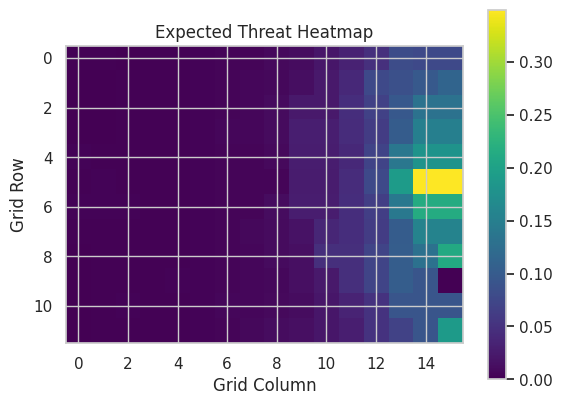

In [335]:
# result_xT = expected_threat(grid_xG, shot_probability, move_probability, my_transmatrix)

plt.imshow(xT, cmap='viridis', aspect=1)
plt.colorbar()  # Add a colorbar to indicate the value scale
plt.title('Expected Threat Heatmap')
plt.xlabel('Grid Column')
plt.ylabel('Grid Row')
plt.show()

#### Put xT into our dataframe





In [336]:

# # Assuming you have a DataFrame called 'my_dataframe'
# final_df.drop([]], axis=1, inplace=True)
# final_df

In [337]:

# Function to get the start indices for each row (player) in the DataFrame
def get_start_indices(row):
    return row['row'] * 16 + row['column']

# Get the start indices for each row (player) in the DataFrame
final_df['Transistion_indicies'] = final_df.apply(get_start_indices, axis=1)

# Function to look up the xT value based on the start_indices
def lookup_xT(row):
    start_idx = row['Transistion_indicies']
    if 0 <= start_idx < 192:
        return xT[start_idx // 16, start_idx % 16]  # Assuming grid_xG is 12x16, adjust the shape accordingly
    else:
        return np.nan

# Look up the xT values for each player and create a new column 'xT_value' to store the values
final_df['xT_value_start'] = final_df.apply(lookup_xT, axis=1)

# Function to get the end indices for each row (player) in the DataFrame
def get_end_indices(row):
    return row['end_row'] * 16 + row['end_column']

# Get the end indices for each row (player) in the DataFrame
final_df['Transistion_end_indicies'] = final_df.apply(get_end_indices, axis=1)

# Function to look up the xT value based on the end_indices
def lookup_xT_end(row):
    end_idx = row['Transistion_end_indicies']
    if 0 <= end_idx < 192:
        xT_value_end = xT[end_idx // 16, end_idx % 16]  # Assuming grid_xG is 12x16, adjust the shape accordingly

        return xT_value_end
    else:
        return np.nan

# Look up the xT values for each player's end indices and create a new column 'xT_value_end' to store the values
final_df['xT_value_end'] = final_df.apply(lookup_xT_end, axis=1)


In [338]:
final_df['xT'] = final_df['xT_value_end'] - final_df['xT_value_start']
final_df

,match_id,index,team,player,timestamp,minute,second,duration,period,possession,...,shot_angle,Distance_shot,result,xS,xM,Transistion_indicies,Transistion_end_indicies,xT_value_start,xT_value_end,xT
0,3857254,5,Denmark,Kasper Dolberg,00:00:00.361,0,0,0.219126,1,2,...,0.0,0.0,1.0,0.000713,0.999287,87,87,0.005268,0.005268,0.000000
1,3857254,7,Denmark,Christian Dannemann Eriksen,00:00:00.580,0,0,0.979460,1,2,...,0.0,0.0,1.0,0.000713,0.999287,87,87,0.005268,0.005268,0.000000
2,3857254,8,Denmark,Christian Dannemann Eriksen,00:00:01.560,0,1,1.255742,1,2,...,0.0,0.0,1.0,0.000713,0.999287,87,121,0.005268,0.016512,0.011244
3,3857254,10,Denmark,Andreas Skov Olsen,00:00:02.816,0,2,0.976961,1,2,...,0.0,0.0,1.0,0.000000,1.000000,121,121,0.016512,0.016512,0.000000
4,3857254,12,Denmark,Andreas Skov Olsen,00:00:03.793,0,3,1.666211,1,2,...,0.0,0.0,1.0,0.000000,1.000000,121,170,0.016512,0.020504,0.003992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123759,3869685,4367,France,Aurélien Djani Tchouaméni,00:18:44.648,123,44,2.214869,4,247,...,0.0,0.0,0.0,0.000000,1.000000,119,71,0.007119,0.005268,-0.001852
123760,3869685,4369,France,Aurélien Djani Tchouaméni,00:18:46.863,123,46,4.887965,4,247,...,0.0,0.0,0.0,0.000000,1.000000,71,30,0.005268,0.098198,0.092930
123761,3869685,4371,France,Kylian Mbappé Lottin,00:18:51.751,123,51,4.834789,4,247,...,0.0,0.0,0.0,0.000000,1.000000,30,30,0.098198,0.098198,0.000000
123762,3869685,4376,France,Kylian Mbappé Lottin,00:18:56.586,123,56,0.723602,4,247,...,0.0,0.0,0.0,0.000000,1.000000,30,46,0.098198,0.132258,0.034061


In [339]:
# selected_columns = ['player', 'start_cell', 'end_cell', 'type', 'shot_outcome', 'xG', 'xT_value_start','xT_value_end','xT']
# filtered_df = final_df[final_df['player'] == 'Kylian Mbappé Lottin'][selected_columns]
# filtered_df


## Calcualting VAEP

formula for vaep :  V (ai) = Q(Si) − Q(Si−1)

In [340]:
'''
To be continued...
'''

'\nTo be continued...\n'

# Exploratory Data Analysis (EDA)

In [367]:
df = final_df.copy()

In [368]:
df.columns

Index(['match_id', 'index', 'team', 'player', 'timestamp', 'minute', 'second',
       'duration', 'period', 'possession', 'position', 'play_pattern',
       'location', 'type', 'under_pressure', 'pass_length', 'pass_angle',
       'shot_outcome', 'shot_end_location', 'shot_technique',
       'shot_statsbomb_xg', 'shot_type', 'shot_body_part', 'shot_freeze_frame',
       'end_location', 'row', 'column', 'start_cell', 'end_row', 'end_column',
       'end_cell', 'goal_scored', 'team_ranking', 'xG', 'shot_angle',
       'Distance_shot', 'result', 'xS', 'xM', 'Transistion_indicies',
       'Transistion_end_indicies', 'xT_value_start', 'xT_value_end', 'xT'],
      dtype='object')

### Heatmap

In [369]:
df['pass_angle'] = df['pass_angle'].fillna(0)
df['pass_length'] = df['pass_length'].fillna(0)

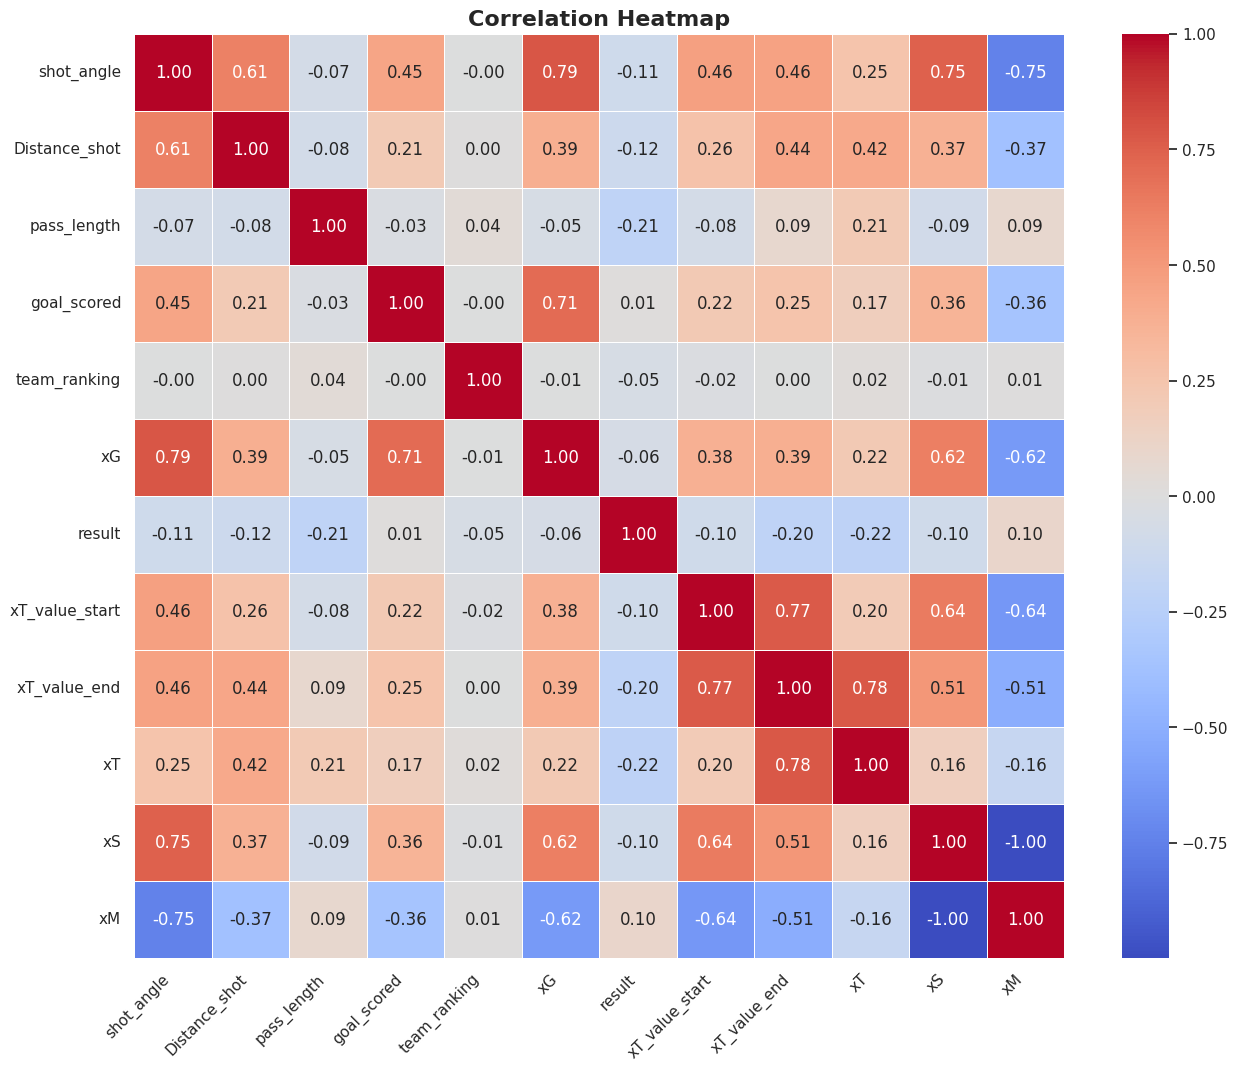

In [370]:
correlation_columns = ['team', 'player', 'shot_angle', 'Distance_shot',
                       'position', 'play_pattern', 'type', 'pass_length',
                       'shot_outcome', 'shot_end_location', 'goal_scored', 'team_ranking',
                       'xG', 'result', 'xT_value_start', 'xT_value_end', 'xT', 'xS', 'xM'
                       ]

correlation_df = df[correlation_columns]

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [371]:
df.isnull().sum()

match_id                         0
index                            0
team                             0
player                           0
timestamp                        0
minute                           0
second                           0
duration                         1
period                           0
possession                       0
position                         0
play_pattern                     0
location                         0
type                             0
under_pressure                   0
pass_length                      0
pass_angle                       0
shot_outcome                122278
shot_end_location           122278
shot_technique              122278
shot_statsbomb_xg           122278
shot_type                   122278
shot_body_part              122278
shot_freeze_frame           122300
end_location                     0
row                              0
column                           0
start_cell                       0
end_row             

In [372]:
#### Drop excessive empty columns

df = df.drop(columns=['shot_freeze_frame', 'shot_body_part', 'shot_type', 'shot_statsbomb_xg',
                      'shot_technique', 'shot_end_location',])


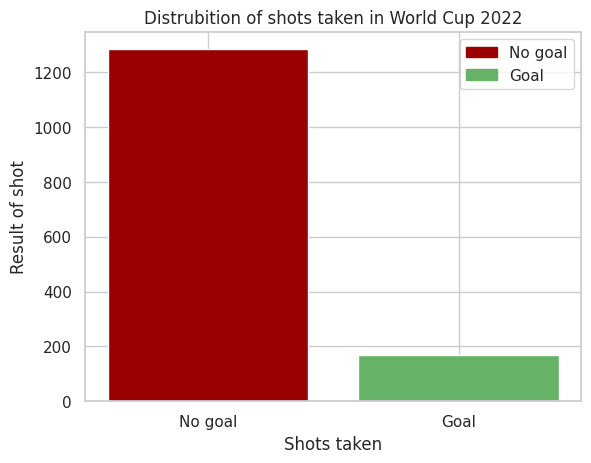

In [373]:
shots_df = df[df['type'] == 'Shot']
value_counts = shots_df['goal_scored'].value_counts()

ticks = [0, 1]
labels = ['No goal', 'Goal']
colors = ['#990000', '#66B266']

plt.bar(value_counts.index, value_counts.values, color=colors)

plt.xlabel('Shots taken')
plt.ylabel('Result of shot')
plt.title('Distrubition of shots taken in World Cup 2022')

plt.xticks(ticks, labels)

legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_patches)

plt.show()


### Top players for xT and xG

In [374]:
player_name = 'Lionel Andrés Messi Cuccittini'

player_df = final_df[final_df['player'] == player_name]

sum_xT = player_df['xT'].sum()

print(f"The sum of xT for {player_name} is: {sum_xT}")


The sum of xT for Lionel Andrés Messi Cuccittini is: 12.765203300821536


In [375]:
player_sum_xT = final_df.groupby('player')['xT'].sum().reset_index()

# Sort the players based on their aggregated xT values in ascending order
# This will give us the players with the worst xT at the top
top_10_worst_players = player_sum_xT.nsmallest(10, 'xT')

print("Top 10 worst players according to their aggregated xT:")
print(top_10_worst_players)


Top 10 worst players according to their aggregated xT:
                          player        xT
61                Anssumane Fati -0.228994
292               Jesus Ferreira -0.160961
360  Kevin José Rodríguez Cortez -0.092147
317               Joshua Sargent -0.083043
435                Michał Skóraś -0.067312
126           Christian Nørgaard -0.060099
626          Unai Simón Mendibil -0.050829
239              Hannibal Mejbri -0.039180
236       Haitham Mohammed Asiri -0.033729
46       Alvaro José Zamora Mata -0.029957


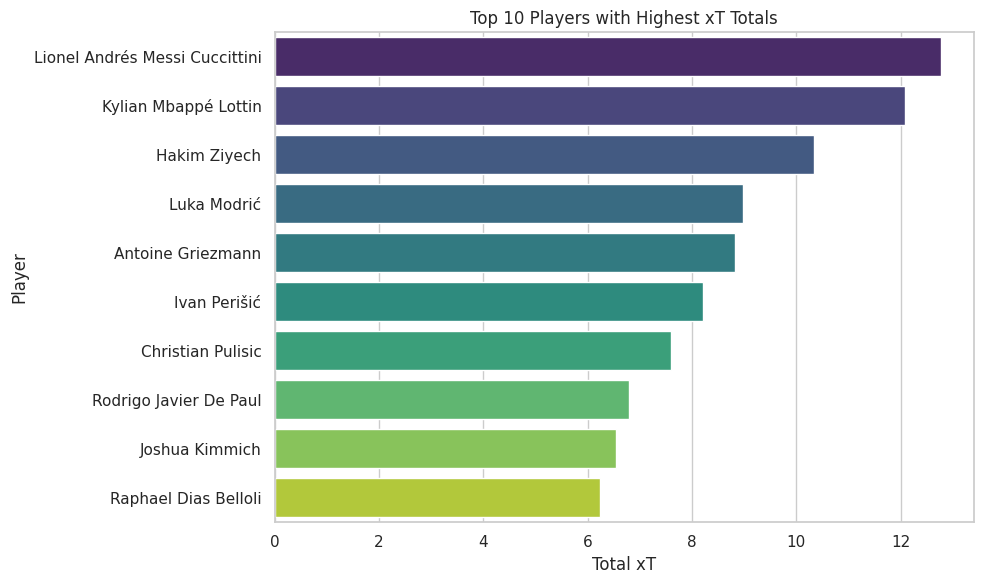

In [376]:
player_xT_sum = df.groupby('player')['xT'].sum()

sorted_players = player_xT_sum.sort_values(ascending=False)

top_10_players = sorted_players.head(10)
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))

sns.barplot(x=top_10_players.values, y=top_10_players.index, palette='viridis')

plt.xlabel('Total xT')
plt.ylabel('Player')
plt.title('Top 10 Players with Highest xT Totals')

plt.tight_layout()
plt.show()


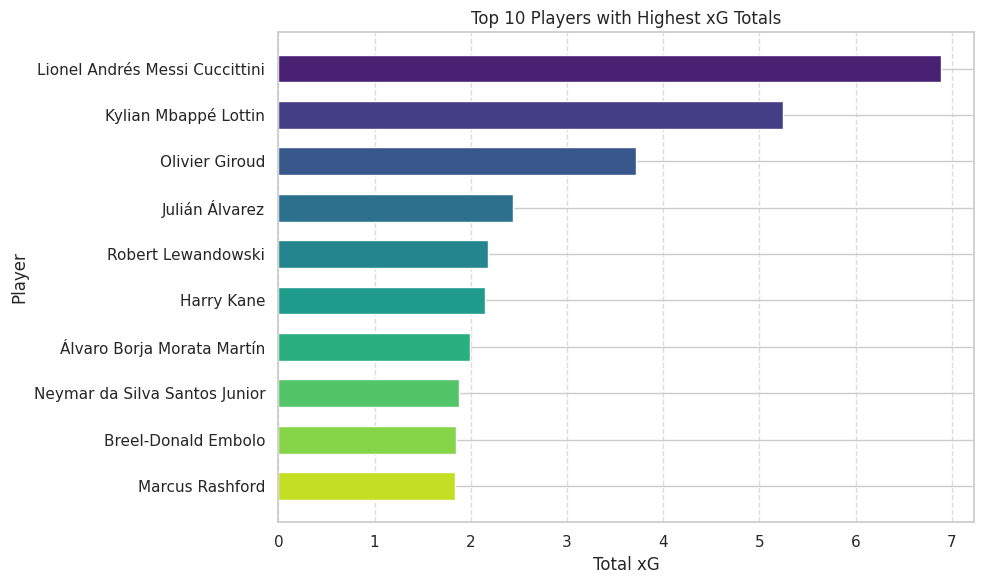

In [377]:
player_xG_sum = df.groupby('player')['xG'].sum()
sorted_players = player_xG_sum.sort_values(ascending=False)

top_10_players = sorted_players.head(10)

sns.set(style='whitegrid')
colors = sns.color_palette('viridis', len(top_10_players))

plt.figure(figsize=(10, 6))

# Create the bar plot for the top 10 players
bar_width = 0.6
plt.barh(top_10_players.index, top_10_players.values, color=colors, height=bar_width)

plt.xlabel('Total xG')
plt.ylabel('Player')
plt.title('Top 10 Players with Highest xG Totals')

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis for better visualization
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


### Best Team preformance

In [378]:
# Sum the xT values for each team by grouping the data by 'team'
team_xT_sum = df.groupby('team')['xT'].sum()

# Find the team with the highest total xT
highest_xT_team = team_xT_sum.idxmax()
highest_xT_value = team_xT_sum.max()

print(f"The team with the highest total xT is {highest_xT_team} with a total xT of {highest_xT_value}.")


The team with the highest total xT is Croatia with a total xT of 55.980318791024125.


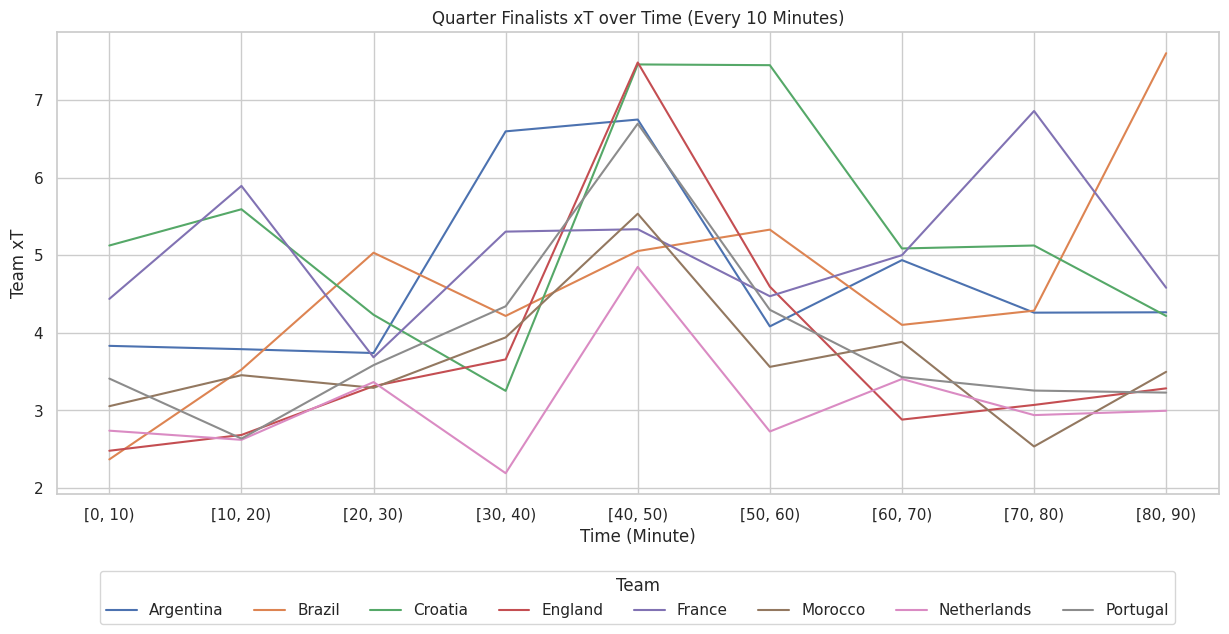

In [379]:
selected_teams = ['Argentina', 'Brazil', 'France', 'Croatia', 'Morocco', 'Netherlands', 'Portugal', 'England']

df_selected_teams = df[df['team'].isin(selected_teams)]

team_xT_over_time = df_selected_teams.groupby([pd.cut(df_selected_teams['minute'], bins=range(0, 100, 10), right=False), 'team'])['xT'].sum().unstack()

team_xT_over_time.plot(kind='line', figsize=(15, 6))
plt.xlabel('Time (Minute)')
plt.ylabel('Team xT')
plt.title('Quarter Finalists xT over Time (Every 10 Minutes)')

plt.legend(title='Team', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(selected_teams))
plt.show()

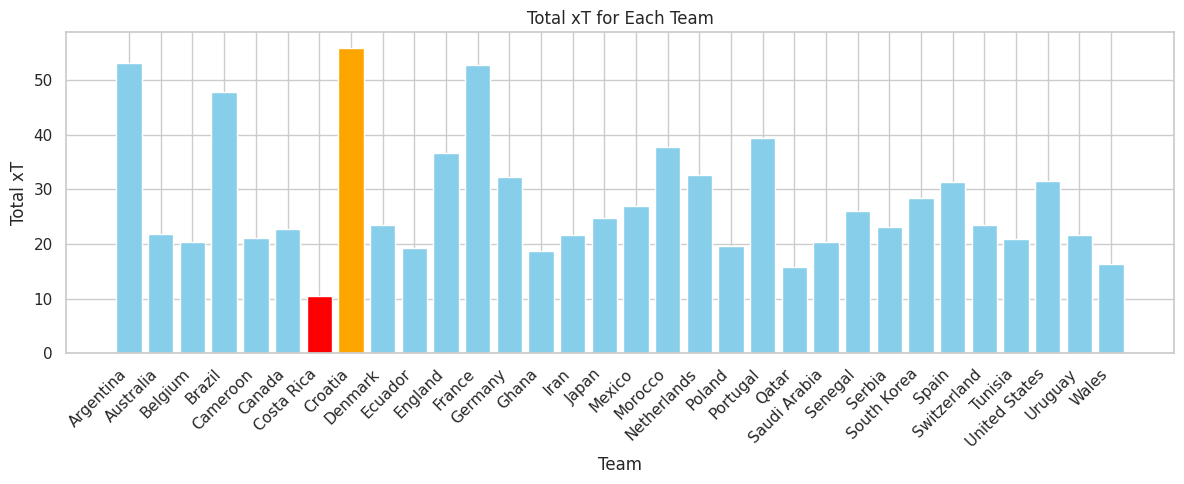

In [380]:

team_xT_sum = df.groupby('team')['xT'].sum()

sorted_teams = team_xT_sum.sort_values(ascending=True)


best_team = sorted_teams.index[-1]
worst_team = sorted_teams.index[0]

plt.figure(figsize=(12, 5))

# Create the bar plot for the total xT values for each team
plt.bar(team_xT_sum.index, team_xT_sum.values, color=['red' if team == worst_team else 'orange' if team == best_team else 'skyblue' for team in team_xT_sum.index])

plt.xlabel('Team')
plt.ylabel('Total xT')
plt.title('Total xT for Each Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


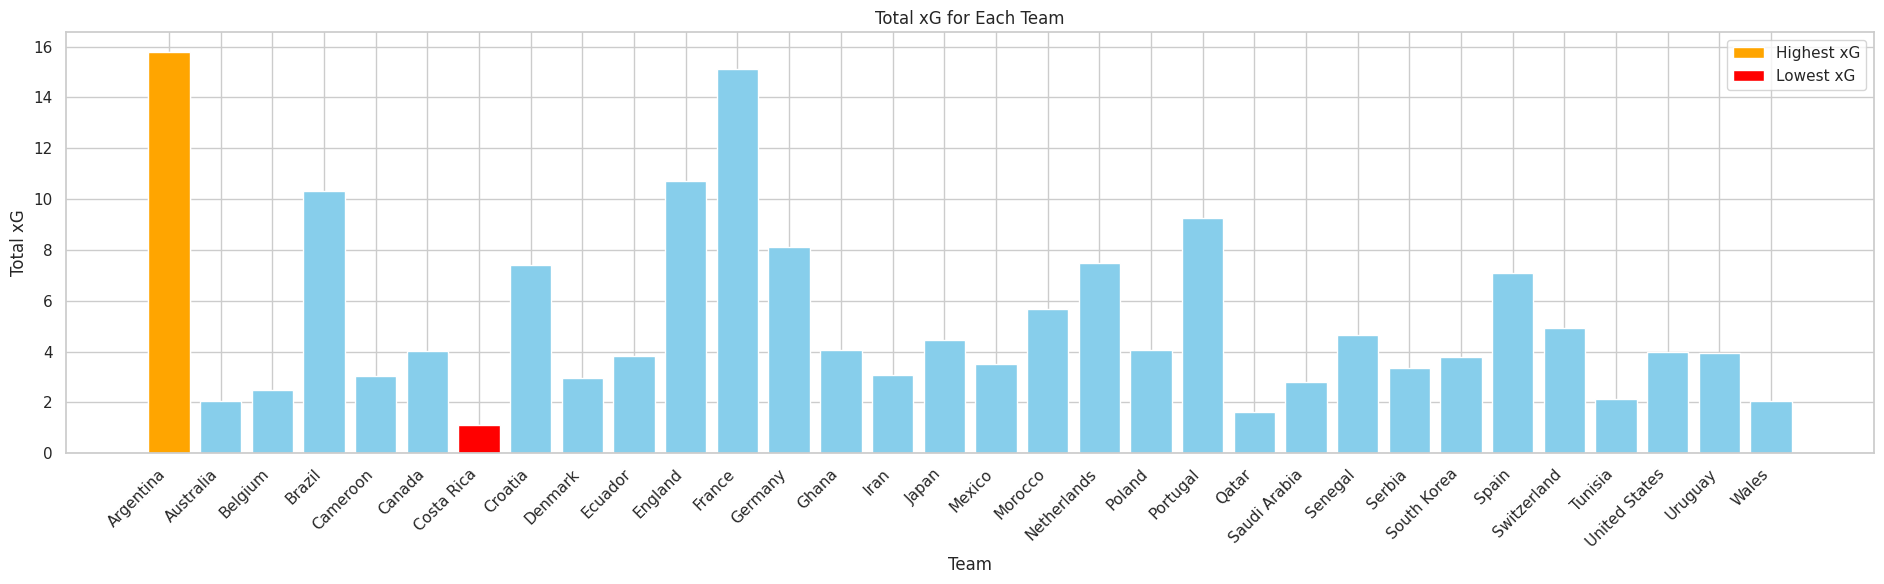

In [381]:
team_xG_sum = df.groupby('team')['xG'].sum()

# Find the team with the highest total xG
highest_xG_team = team_xG_sum.idxmax()
highest_xG_value = team_xG_sum.max()

# Find the team with the lowest total xG
lowest_xG_team = team_xG_sum.idxmin()
lowest_xG_value = team_xG_sum.min()


plt.figure(figsize=(19, 6))

# Create the bar plot for the total xG values for each team
plt.bar(team_xG_sum.index, team_xG_sum.values, color='skyblue')

# Highlight the team with the highest and lowest xG
plt.bar(highest_xG_team, highest_xG_value, color='orange', label='Highest xG')
plt.bar(lowest_xG_team, lowest_xG_value, color='red', label='Lowest xG')

plt.xlabel('Team')
plt.ylabel('Total xG')
plt.title('Total xG for Each Team')
plt.xticks(rotation=45, ha='right')
plt.legend()


plt.tight_layout()
plt.show()


In [382]:
player_name = 'Kylian Mbappé Lottin'

# Filter the DataFrame to include only the rows for the specific player
player_df = final_df[final_df['player'] == player_name]

# Calculate the sum of xT for the specific player
sum_xT = player_df['xT'].sum()

print(f"The sum of xT for {player_name} is: {sum_xT}")

The sum of xT for Kylian Mbappé Lottin is: 12.079204645689689


In [383]:
# # Step 1: Create a new column to store the calculated minutes played
# subs_df['minutes_played'] = 0

# # Step 2: Iterate through each match_id and player and update 'minutes_played' accordingly
# for index, row in subs_df.iterrows():
#     if row['type'] == 'Substitution':
#         if row['substitution_replacement'] == row['player']:
#             if row['period'] <= 2:
#                 minutes_played = 90 - row['minute']
#             else:
#                 minutes_played = 120 - row['minute']
#             subs_df.at[index, 'minutes_played'] = minutes_played
#         else:
#             subs_df.at[index, 'minutes_played'] = row['minute']

# # Display the DataFrame with the total minutes played for each player
# subs_df


In [384]:
# df['minutes_played'] = subs_df['minutes_played']
# # First, create a dictionary to map 'match_id' to its corresponding max period
# match_id_max_period = subs_df.groupby('match_id')['period'].max().to_dict()

# # Next, use apply method to fill the NaN values in 'minutes_played' column based on the max period
# df['minutes_played'] = df.apply(lambda row: 90 if pd.isna(row['minutes_played']) and match_id_max_period[row['match_id']] <= 2 else
#                                               120 if pd.isna(row['minutes_played']) and match_id_max_period[row['match_id']] >= 4 else
#                                               row['minutes_played'], axis=1)

# # df

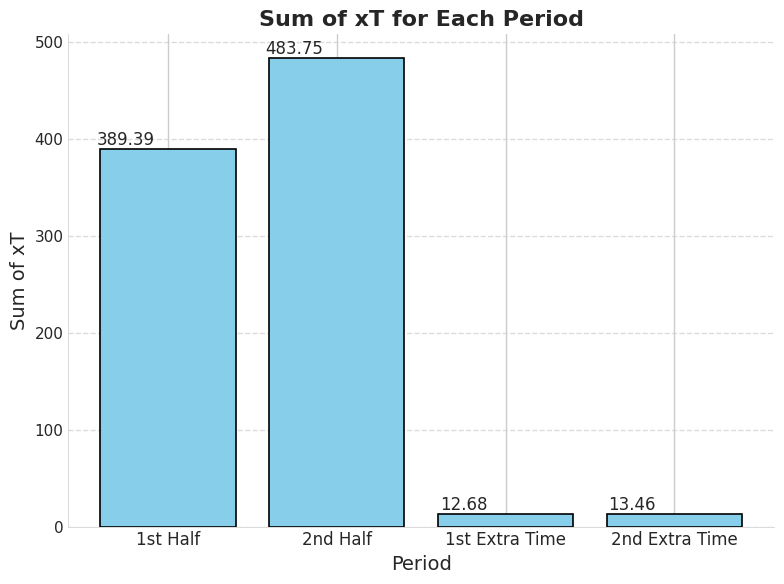

In [385]:

period_sum_xt = df.groupby('period')['xT'].sum().reset_index()

# Create a bar plot to visualize the sum of xT for each period
plt.figure(figsize=(8, 6))
plt.bar(period_sum_xt['period'], period_sum_xt['xT'], color='skyblue', edgecolor='black', linewidth=1.2)

plt.xlabel('Period', fontsize=14)
plt.ylabel('Sum of xT', fontsize=14)
plt.title('Sum of xT for Each Period', fontsize=16, fontweight='bold')

plt.xticks(period_sum_xt['period'], labels=['1st Half', '2nd Half', '1st Extra Time', '2nd Extra Time'], fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

plt.tick_params(axis='both', which='both', length=0)  # Hide tick marks

# Add annotations to the bars to show the exact values
for index, value in enumerate(period_sum_xt['xT']):
    plt.text(index + 0.75, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()

plt.show()


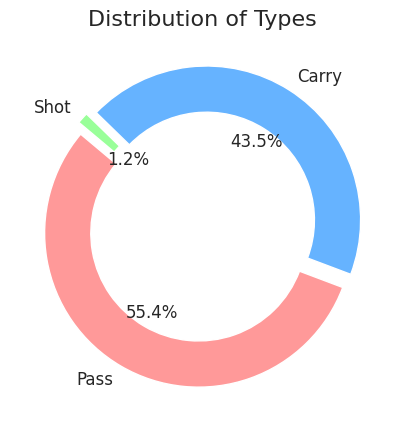

In [386]:
types_counts = final_df['type'].value_counts()
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

plt.figure(figsize=(5, 5))
explode = [0.05] * len(types_counts)  # Explode all the slices slightly for better visibility

# Create the pie chart with updated visual settings
plt.pie(types_counts, labels=types_counts.index, colors=custom_colors, autopct='%1.1f%%', startangle=140, explode=explode,
        wedgeprops=dict(width=0.3, edgecolor='w'), textprops={'fontsize': 12})

plt.title('Distribution of Types', fontsize=16)
plt.legend().set_visible(False)

plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))

plt.show()


In [387]:
df[df['team'] == 'Argentina' ]

,match_id,index,team,player,timestamp,minute,second,duration,period,possession,...,shot_angle,Distance_shot,result,xS,xM,Transistion_indicies,Transistion_end_indicies,xT_value_start,xT_value_end,xT
18458,3857264,10,Argentina,Marcos Javier Acuña,00:00:18.655,0,18,1.042480,1,3,...,0.000000,0.000000,1.0,0.000000,1.000000,2,4,0.001343,0.002469,0.001126
18459,3857264,13,Argentina,Julián Álvarez,00:00:19.698,0,19,1.171469,1,3,...,0.000000,0.000000,0.0,0.000000,1.000000,4,21,0.002469,0.003358,0.000889
18462,3857264,22,Argentina,Julián Álvarez,00:00:22.135,0,22,0.783972,1,3,...,0.000000,0.000000,0.0,0.000000,1.000000,21,21,0.003358,0.003358,0.000000
18469,3857264,37,Argentina,Nahuel Molina Lucero,00:00:49.965,0,49,0.694709,1,5,...,0.000000,0.000000,1.0,0.000000,1.000000,181,148,0.003324,0.003392,0.000068
18470,3857264,39,Argentina,Rodrigo Javier De Paul,00:00:51.151,0,51,0.508358,1,5,...,0.000000,0.000000,1.0,0.000000,1.000000,148,164,0.003392,0.002722,-0.000670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123753,3869685,4355,Argentina,Gonzalo Ariel Montiel,00:17:58.777,122,58,1.057331,4,246,...,0.000000,0.000000,0.0,0.017007,0.982993,141,93,0.103663,0.191747,0.088084
123754,3869685,4357,Argentina,Lautaro Javier Martínez,00:17:59.834,122,59,0.914533,4,246,...,45.949567,9.338094,0.0,0.566879,0.433121,93,111,0.191747,0.215595,0.023849
123756,3869685,4360,Argentina,Marcos Javier Acuña,00:18:39.985,123,39,0.740403,4,247,...,0.000000,0.000000,0.0,0.000000,1.000000,37,55,0.003757,0.006505,0.002747
123757,3869685,4362,Argentina,Leandro Daniel Paredes,00:18:42.130,123,42,0.736452,4,247,...,0.000000,0.000000,0.0,0.000000,1.000000,53,55,0.003263,0.006505,0.003242


### Compare xT with other probabilities

In [388]:
pass_df = df[df['type'] == 'Pass']

player_stats = pass_df.groupby('player').agg(
    num_passes=('type', 'count'),
    total_xT=('xT', 'sum')
).reset_index()

player_stats['total_xT'] = np.where(player_stats['total_xT'] >= 0, player_stats['total_xT'], 0)

fig = px.scatter(player_stats, x='num_passes', y='total_xT', size='total_xT',
                 color='total_xT', hover_name='player', log_y=False, size_max=50,
                 labels={'num_passes': 'Number of Passes', 'total_xT': 'Sum of Threat Score'})

fig.update_layout(
    title='Bubble Chart: Threat Score vs. Number of Passes',
    xaxis_title='Number of Passes',
    yaxis_title='Sum of Threat Score',
    showlegend=False,  # Remove the legend for the 'total_xT' color scale
)
fig.show()


In [389]:
pass_df = df[df['type'] == 'Carry']
player_stats = pass_df.groupby('player').agg(
    Carries=('type', 'count'),
    total_xT=('xT', 'sum')
).reset_index()

player_stats['total_xT'] = np.where(player_stats['total_xT'] >= 0, player_stats['total_xT'], 0)

fig = px.scatter(player_stats, x='Carries', y='total_xT', size='total_xT',
                 color='total_xT', hover_name='player', log_y=False, size_max=50,
                 labels={'Carries': 'Movement of the ball', 'total_xT': 'Sum of Threat Score'})

fig.update_layout(
    title='Bubble Chart: Threat Score vs. Carry threat',
    xaxis_title='Movement with ball',
    yaxis_title='Sum of Threat Score',
    showlegend=False,  # Remove the legend for the 'total_xT' color scale
)
fig.show()


In [390]:
pass_df = df[df['type'] == 'Shot']

player_stats = pass_df.groupby('player').agg(
    Shots=('type', 'count'),
    total_xT=('xT', 'sum')
).reset_index()
player_stats['total_xT'] = np.where(player_stats['total_xT'] >= 0, player_stats['total_xT'], 0)

fig = px.scatter(player_stats, x='Shots', y='total_xT', size='total_xT',
                 color='total_xT', hover_name='player', log_y=False, size_max=50,
                 labels={'Shots': 'Number of shots', 'total_xT': 'Sum of Threat Score'})

fig.update_layout(
    title='Bubble Chart: Threat Score vs. Carry threat',
    xaxis_title='Number of Shots',
    yaxis_title='Sum of Threat Score',
    showlegend=False,  # Remove the legend for the 'total_xT' color scale
)

fig.show()

In [391]:
df.columns

Index(['match_id', 'index', 'team', 'player', 'timestamp', 'minute', 'second',
       'duration', 'period', 'possession', 'position', 'play_pattern',
       'location', 'type', 'under_pressure', 'pass_length', 'pass_angle',
       'shot_outcome', 'end_location', 'row', 'column', 'start_cell',
       'end_row', 'end_column', 'end_cell', 'goal_scored', 'team_ranking',
       'xG', 'shot_angle', 'Distance_shot', 'result', 'xS', 'xM',
       'Transistion_indicies', 'Transistion_end_indicies', 'xT_value_start',
       'xT_value_end', 'xT'],
      dtype='object')

In [392]:
shots_df = df[df['type'] == 'Shot']
player_stats = shots_df.groupby('player').agg(
    total_shots=('type', 'count'),
    shots_on_goal=('shot_outcome', lambda x: sum(x == 'Goal'))
).reset_index()

# Create the bubble chart with 'total_shots' as the x-axis and 'shots_on_goal' as the y-axis
fig = px.scatter(player_stats, x='total_shots', y='shots_on_goal', size='shots_on_goal',
                 color='shots_on_goal', hover_name='player',size_max=50,
                 labels={'total_shots': 'Total Number of Shots', 'shots_on_goal': 'Shots Resulting in a Goal'})

fig.update_layout(
    title='Bubble Chart: Shots Resulting in a Goal vs. Total Number of Shots',
    xaxis_title='Total Number of Shots',
    yaxis_title='Shots Resulting in a Goal',
    showlegend=False,  # Remove the legend for the 'shots_on_goal' color scale
)
fig.show()


### Boxplots

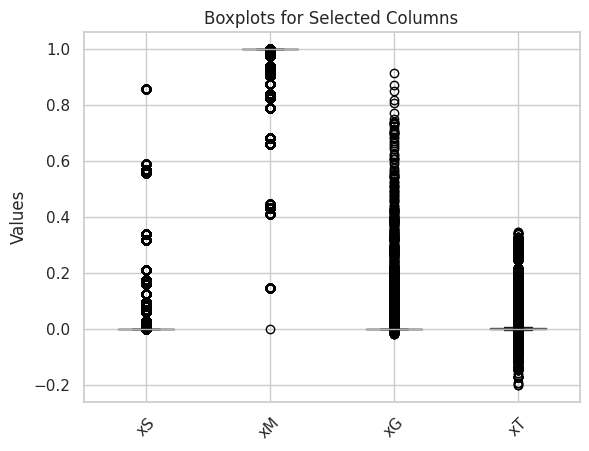

In [393]:
# Plot only specific columns from 'df'
selected_columns = ['xS', 'xM', 'xG', 'xT',]
df[selected_columns].boxplot()

# Set the title, y-axis label, and optionally rotate x-axis labels
plt.title("Boxplots for Selected Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [394]:
df.columns

Index(['match_id', 'index', 'team', 'player', 'timestamp', 'minute', 'second',
       'duration', 'period', 'possession', 'position', 'play_pattern',
       'location', 'type', 'under_pressure', 'pass_length', 'pass_angle',
       'shot_outcome', 'end_location', 'row', 'column', 'start_cell',
       'end_row', 'end_column', 'end_cell', 'goal_scored', 'team_ranking',
       'xG', 'shot_angle', 'Distance_shot', 'result', 'xS', 'xM',
       'Transistion_indicies', 'Transistion_end_indicies', 'xT_value_start',
       'xT_value_end', 'xT'],
      dtype='object')

### Individualual events

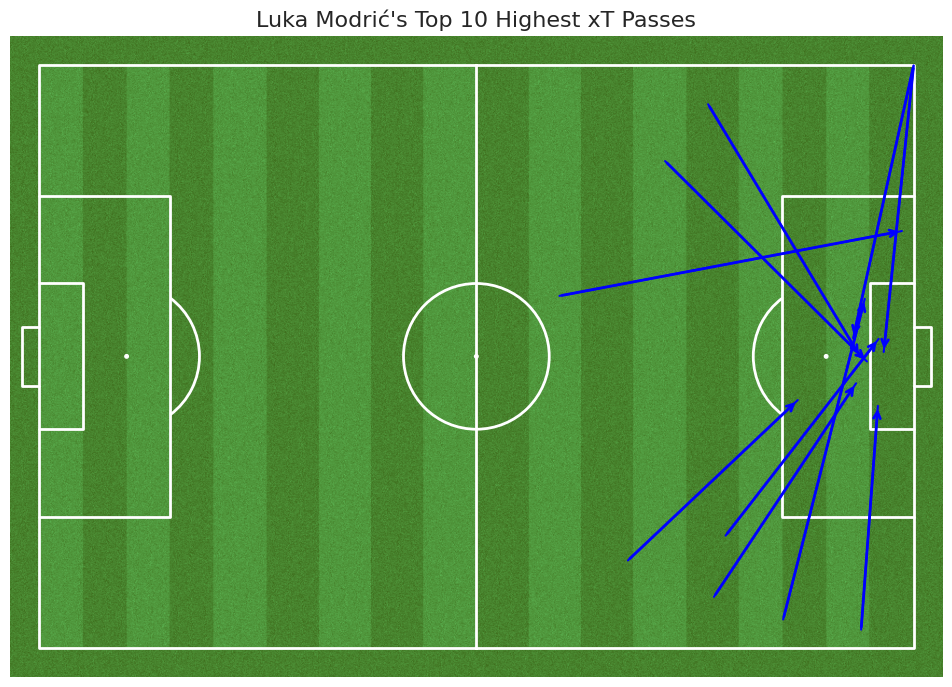

In [395]:

# Sort the DataFrame by xT values in descending order for Luka Modrić
df_modric_passes = df[(df['type'] == 'Pass') & (df['player'] == 'Luka Modrić')]
df_modric_passes = df_modric_passes.sort_values(by='xT', ascending=False)

# Create a pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, pitch_type='statsbomb',
              pitch_length=100, pitch_width=70, goal_type='box')

# Create the figure and axis with adjusted figsize for correct aspect ratio
fig, ax = pitch.draw(figsize=(10, 7))

# Plot the top 5 highest xT passes with arrows
for idx, row in df_modric_passes.head(10).iterrows():
    x_start, y_start = row['location'][0], row['location'][1]  # Extract start location from 'location' column
    x_end, y_end = row['end_location'][0], row['end_location'][1]  # Extract end location from 'end_location' column
    ax.plot([x_start, x_end], [y_start, y_end], color='blue', zorder=1)
    ax.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start),
                arrowprops=dict(arrowstyle="->", color='blue', lw=2), zorder=2)

# Add player name and title
player_name = "Luka Modrić"
ax.set_title(f"{player_name}'s Top 10 Highest xT Passes", fontsize=16)

# Display the plot
plt.show()


In [396]:

df_passes = df[df['type'] == 'Pass']

# Group by player and count completed and attempted passes
pass_stats = df_passes.groupby('player')['result'].agg(['sum', 'count'])

# Filter out players with no pass attempts
pass_stats = pass_stats[pass_stats['count'] > 0]

# Calculate pass accuracy for each player (completed passes / attempted passes)
pass_stats['pass_accuracy'] = pass_stats['sum'] / pass_stats['count']

# Filter out players with less than 350 passes attempted
pass_stats = pass_stats[pass_stats['count'] >= 350]

# Sort the DataFrame by pass accuracy in descending order
pass_stats_sorted = pass_stats.sort_values(by='pass_accuracy', ascending=False)

# Select the top N players with the highest pass accuracy
N = 10  # Replace N with the number of top players you want to visualize
top_players = pass_stats_sorted.head(N)

# Create a custom color palette with your desired colors
colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f']

# Create a bar chart using Plotly
fig = go.Figure(data=go.Bar(
    x=top_players['pass_accuracy'],
    y=top_players.index,
    orientation='h',
    marker_color=colors,
    text=top_players['pass_accuracy'].apply(lambda x: f'{x:.2%}'),  # Format accuracy as percentage for hover text
    hoverinfo='y+text',  # Show player name and accuracy on hover
))

# Customize the layout
fig.update_layout(
    title=f"Top {N} Players with Highest Pass Accuracy (At least 350 passes)",
    xaxis_title="Pass Accuracy",
    yaxis_title="Player Name",
    xaxis_tickformat='%{x:.2%}',  # Format x-axis labels as percentage
    height=500,
    margin=dict(l=100, r=20, t=70, b=70),  # Adjust margins for better visualization
    template='plotly_white',  # Use a white template for a cleaner look
)

# Show the plot
fig.show()


# Model Implementation

In [ ]:
ml_df = df.copy()

In [ ]:

columns_to_drop = ['timestamp', 'shot_freeze_frame', 'shot_type', 'location', 'shot_statsbomb_xg',
                   'shot_freeze_frame', 'end_location', 'start_cell', 'end_cell', 'team', 'player',
                   'shot_end_location', 'play_pattern']
ml_df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
ml_df.columns

In [ ]:
'''

1: GK, 2: RB, 3: RCB, 4: CB, 5: LCB, 6: LB, 7:RWB, 8: LWB, 9: RDM,
10: CDM, 11: LDM, 12: RM, 13: RCM, 14: CM, 15: LCM, 16:LM, 17:RW,
18:RAM, 19:CAM, 20: LAM, 21: LW, 22: RCF, 23:ST, 24: LCF, 25: SS
'''

position_mapping = {
    'Goalkeeper': 1,
    'Right Back': 2,
    'Right Center Back': 3,
    'Center Back': 4,
    'Left Center Back': 5,
    'Left Back': 6,
    'Right Wing Back': 7,
    'Left Wing Back': 8,
    'Right Defensive Midfield': 9,
    'Center Defensive Midfield': 10,
    'Left Defensive Midfield': 11,
    'Right Midfield': 12,
    'Right Center Midfield': 13,
    'Center Midfield': 14,
    'Left Center Midfield': 15,
    'Left Midfield': 16,
    'Right Wing': 17,
    'Right Attacking Midfield': 18,
    'Center Attacking Midfield': 19,
    'Left Attacking Midfield': 20,
    'Left Wing': 21,
    'Right Center Forward': 22,
    'Center Forward': 23,
    'Left Center Forward': 24,
    'Second Striker': 25
}

# Use the 'replace' method to map the positions to their corresponding label encoded values
ml_df['position_encoded'] = ml_df['position'].replace(position_mapping)


label_encoder = LabelEncoder()
ml_df['type_encoded'] = label_encoder.fit_transform(ml_df['type'])
# Pass: 1, Carry: 0 Shot: 2

ml_df['shot_outcome_encoded'] = label_encoder.fit_transform(ml_df['shot_outcome'])
# 0: Bloacked, 1: Goal, 2: Off T, 3: Post,4: Saved,5: Saved Off Target, 6:Saved to Post, 7: WayWard ,8: nan,

ml_df['shot_technique_encoded'] = label_encoder.fit_transform(ml_df['shot_technique'])
# 0: Backheel, 1: Diving Header, 2: Half Volley, 3: Lob, 4: Normal, 5: Overhead Kick, 6: Volley, 7: nan

ml_df['shot_technique_encoded'].unique()

In [ ]:
# ml_df['shot_type'].unique()

In [ ]:
ml_df.columns

In [ ]:

# Specify the columns in which you want to fill NaN values with 0
columns_to_fill_with_zero = ['pass_angle', 'pass_length', 'xM', 'duration']

# Fill NaN values with 0 in the specified columns only
ml_df[columns_to_fill_with_zero] = ml_df[columns_to_fill_with_zero].fillna(0)

# If you want to modify the original DataFrame 'df' in-place, you can use the 'inplace=True' parameter
# df[columns_to_fill_with_zero].fillna(0, inplace=True)


In [ ]:

null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)


## Our model is overfitted

In [ ]:
# Assuming you have your data in a DataFrame called 'ml_df' with the target variable 'xT' and features 'X'
X = ml_df[['xG', 'xS', 'xM', 'Transistion_end_indicies', 'Transistion_indicies', 'xT_value_start', 'xT_value_end',
           'pass_length', 'goal_scored']]

y = ml_df['xT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Determine the number of samples to keep (you can set it to a specific number or percentage)
num_samples_to_keep = 1000

# Perform random undersampling on the training data
if num_samples_to_keep < len(y_train):
    idx_to_keep = np.random.choice(np.arange(len(y_train)), size=num_samples_to_keep, replace=False)
    X_train_resampled = X_train.iloc[idx_to_keep]
    y_train_resampled = y_train.iloc[idx_to_keep]
else:
    X_train_resampled = X_train
    y_train_resampled = y_train

# Create and train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = reg_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual xT')
plt.ylabel('Predicted xT')
plt.title('Actual vs. Predicted xT (Random Forest Regression)')
plt.show()


In [ ]:
X = ml_df[['xG', 'xS', 'xM', 'Transistion_end_indicies', 'Transistion_indicies', 'xT_value_start', 'xT_value_end',
           'pass_length', 'goal_scored']]

y = ml_df['xT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_model = LinearRegression()

train_sizes, train_scores, val_scores = learning_curve(
    reg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores = -train_scores
val_scores = -val_scores

# Calculate mean and standard deviation for each training set size
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation score', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.show()


## Solution for the overfitting

#### Feature Selection

In [ ]:
ml_df.columns

In [ ]:
# Drop the target column from the features
X = ml_df.drop(['xT', 'type', 'shot_outcome', 'shot_technique', 'shot_body_part', 'position'], axis=1)

# Extract the target column
y = ml_df['xT']

# Perform feature selection using SelectKBest and ANOVA scoring function
num_features_to_select = 10  # Set the number of features you want to select
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the names of the selected features
print(selected_features)


### XGBoost

In [ ]:
X = ml_df[['xG', 'xS', 'xM', 'Transistion_end_indicies', 'Transistion_indicies', 'xT_value_start', 'xT_value_end',
           'pass_length', 'goal_scored']]
y = ml_df['xT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameters
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100  # Number of boosting rounds (trees)
}

# Create the XGBoost model
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")



### Gradient Boosting

In [ ]:
X = ml_df[['xG', 'xS', 'xM', 'Transistion_end_indicies', 'Transistion_indicies', 'xT_value_start', 'xT_value_end',
           'pass_length', 'goal_scored']]
y = ml_df['xT']

# Define the hyperparameters with regularization
params_regularized = {
    'n_estimators': 30,
    'learning_rate': 0.1,       # You can adjust this value as needed
    'max_depth': 3,             # You can adjust this value as needed
    'min_samples_split': 5,     # You can adjust this value as needed
    'min_samples_leaf': 2,      # You can adjust this value as needed
    'criterion': 'friedman_mse' # Use 'mse' for least squares regression
}

# Create the Gradient Boosting model with regularization
model_regularized = GradientBoostingRegressor(**params_regularized)

# Train the model on the training data
model_regularized.fit(X_train, y_train)

# Make predictions on the test set
y_pred_regularized = model_regularized.predict(X_test)

# Evaluate the model's performance with regularization
mse_regularized = mean_squared_error(y_test, y_pred_regularized)
r2_regularized = r2_score(y_test, y_pred_regularized)

print(f"Regularized Mean Squared Error (MSE): {mse_regularized}")
print(f"Regularized R-squared (R2): {r2_regularized}")


In [ ]:
X = ml_df[['xG', 'xS', 'xM', 'Transistion_end_indicies', 'Transistion_indicies', 'xT_value_start', 'xT_value_end',
           'pass_length', 'goal_scored']]
y = ml_df['xT']


# Define the hyperparameters with regularization (except n_estimators)
params_regularized = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'criterion': 'friedman_mse'
}

# Define a list of n_estimators values to try
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialize lists to store R2 scores for each n_estimators value
r2_scores = []

# Train the model for each n_estimators value and store the R2 scores
for n_estimators in n_estimators_values:
    params_regularized['n_estimators'] = n_estimators
    model_regularized = GradientBoostingRegressor(**params_regularized)
    model_regularized.fit(X_train, y_train)
    y_pred_regularized = model_regularized.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred_regularized))

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_values, r2_scores, marker='o', linestyle='-')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('R-squared (R2) Score')
plt.title('Effect of Number of Estimators on R-squared (R2) Score')
plt.grid(True)
plt.show()


### Random Forest

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = ml_df[['xG', 'xS', 'xM', 'Transistion_end_indicies', 'Transistion_indicies', 'xT_value_start', 'xT_value_end',
           'pass_length', 'goal_scored']]
y = ml_df['xT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regression model with warm_start=True
# warm_start=True allows us to use early stopping
model = RandomForestRegressor(n_estimators=1, random_state=42, warm_start=True)

# Train the model on the training data with early stopping
best_model = None
best_mse = np.inf
for n_estimators in range(1, 101):  # Increase the number of estimators if early stopping is not achieved
    model.set_params(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_model = model
    else:
        # Early stopping when MSE starts increasing
        break

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

### Lasso Regression(L1 Regularization)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you have another model that requires scaled features (e.g., regularized linear regression)

# Create a pipeline with a scaler and the model

# For example, using StandardScaler and Ridge regression
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=0.1))

# Train the Ridge model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model's performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R-squared (R2): {r2_ridge}")


### Ridge Regression (L2 Regularization)

In [ ]:
X = ml_df[['xG', 'xS', 'xM', 'Transistion_end_indicies', 'Transistion_indicies', 'xT_value_start', 'xT_value_end',
           'pass_length', 'goal_scored']]
y = ml_df['xT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Ridge Regression model with regularization strength (alpha)
ridge_model = Ridge(alpha=10.0)  # You can adjust the value of alpha as needed

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model's performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge Regression - R-squared (R2): {r2_ridge}")


### Decision Trees with reguralization

In [ ]:
X = ml_df[['xG', 'xS', 'xM', 'Transistion_end_indicies', 'Transistion_indicies', 'xT_value_start', 'xT_value_end',
           'pass_length', 'goal_scored']]
y = ml_df['xT']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree Regressor model with a maximum depth
# Adjust the max_depth parameter to control the depth of the tree (regularization)
model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


# Result Analysis

#### Gradient Boosting

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming you have already defined and split the data as in your code
# # ...

# # Define the hyperparameters with regularization (except n_estimators)
# params_regularized = {
#     'learning_rate': 0.1,
#     'max_depth': 3,
#     'min_samples_split': 5,
#     'min_samples_leaf': 2,
#     'criterion': 'friedman_mse'
# }

# # Initialize an empty list to store the MSE for each boosting round
# train_errors = []
# test_errors = []

# # Define the number of boosting rounds to consider
# n_estimators_values = range(1, 101)

# # Create the Gradient Boosting model with regularization
# model_regularized = GradientBoostingRegressor(**params_regularized)

# # Train the model on the training data and calculate MSE at each iteration
# for n_estimators in n_estimators_values:
#     model_regularized.n_estimators = n_estimators
#     model_regularized.fit(X_train, y_train)

#     # Predict on training set
#     y_pred_train = model_regularized.predict(X_train)
#     train_errors.append(mean_squared_error(y_train, y_pred_train))

#     # Predict on test set (validation set)
#     y_pred_test = model_regularized.predict(X_test)
#     test_errors.append(mean_squared_error(y_test, y_pred_test))

# # Plot the learning curve
# plt.figure(figsize=(8, 6))
# plt.plot(n_estimators_values, train_errors, label='Training error', color='blue')
# plt.plot(n_estimators_values, test_errors, label='Validation error', color='red')
# plt.xlabel('Number of Estimators (n_estimators)')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.title('Learning Curve - Regularized Gradient Boosting')
# plt.legend()
# plt.grid(True)
# plt.show()


#### Ridge Regression (L2 Reguarization)

In [ ]:
X = ml_df[['xG', 'xS', 'xM', 'Transistion_end_indicies', 'Transistion_indicies', 'xT_value_start', 'xT_value_end',
           'pass_length', 'goal_scored']]
y = ml_df['xT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to try
alphas = np.logspace(-3, 3, num=7)

# Store R-squared scores for each alpha
r2_scores = []

# Iterate over different alpha values and store R-squared scores
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# Plot alpha values against R-squared scores
plt.figure(figsize=(8, 6))
plt.semilogx(alphas, r2_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('R-squared vs. Alpha')
plt.grid(True)
plt.show()


In [ ]:

# Create the learning curve
train_sizes, train_scores, test_scores = learning_curve(ridge_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation error', color='red')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.15, color='red')
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve - Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()


### Decision Trees with reguralization

In [ ]:

# Assuming your data is stored in a pandas DataFrame 'ml_df'
X = ml_df[['xG', 'xS', 'xM', 'Transistion_end_indicies', 'Transistion_indicies', 'xT_value_start', 'xT_value_end',
           'pass_length', 'goal_scored']]
y = ml_df['xT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree Regressor model with a maximum depth
# Adjust the max_depth parameter to control the depth of the tree (regularization)
model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")


In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

In [ ]:
desc = (y_test- y_pred) / y_pred
desc.mean()